# Diccionarios v2:
Este código usa "Routines.py", donde se encuentran las funciones principales usadas
### Importar librerías

In [1]:
## Importar librerías 
import sys
import os
import Routines
import pandas
import numpy
import pprint
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BRAYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BRAYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Nombres de las carpetas con los testimonios:

In [2]:
##Carpetas
FolderBase="../testimonios completos/"
TestimoniosNombres=os.listdir(FolderBase)

#Carpetas con los testimonios Test:
FolderTestN=FolderBase+"2. testimonios+bitacoras para testeo = 20/Natalia/"
FolderTestT=FolderBase+"2. testimonios+bitacoras para testeo = 20/Tatiana/"
FolderTest2 = FolderBase + "4. testimonios+bitacoras para testeo2 = 20/"

#Carpetas con los testimonios Train:
FolderTrainA = FolderBase + "1. testimonios+bitacoras para entrenamiento = 116/Ana María/"
FolderTrainN = FolderBase + "1. testimonios+bitacoras para entrenamiento = 116/Natalia/"
FolderTrainS = FolderBase + "1. testimonios+bitacoras para entrenamiento = 116/Sandra/"
FolderTrainT = FolderBase + "1. testimonios+bitacoras para entrenamiento = 116/Tatiana/"
AllFolders = [FolderTestN,FolderTestT,FolderTest2,FolderTrainA,FolderTrainN,FolderTrainS,FolderTrainT]

#Mostrar ubicacion y contenido de cada carpeta definida
for fold in AllFolders:
    print(fold)
    print(len(os.listdir(fold)))

../testimonios completos/2. testimonios+bitacoras para testeo = 20/Natalia/
10
../testimonios completos/2. testimonios+bitacoras para testeo = 20/Tatiana/
10
../testimonios completos/4. testimonios+bitacoras para testeo2 = 20/
20
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Ana María/
29
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Natalia/
29
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Sandra/
29
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Tatiana/
29


### Definir diccionarios de afectaciones

In [3]:
MyDictionaryToUse='Diccionario_V2_2CSV.csv'  #Archivo CSV (diccionario) a usar
Afects=Routines.DictsBuild(CSVFile=MyDictionaryToUse)     # Afectaciones:sinónimos
AfectsExpr=Routines.DictsBuild(CSVFile=MyDictionaryToUse, StringDeUso='Expresiones')   #Afectaciones:expresiones
print(Afects.keys())
print(AfectsExpr.keys())

dict_keys(['economicas y materiales', 'fisicas', 'politicas', 'psicologicas', 'angustia', 'culpa', 'impotencia', 'incertidumbre', 'miedo', 'ira', 'socioculturales', 'estigmatizacion', 'descredito'])
dict_keys(['economicas y materiales', 'fisicas', 'politicas', 'psicologicas', 'angustia', 'culpa', 'impotencia', 'incertidumbre', 'miedo', 'ira', 'socioculturales', 'estigmatizacion', 'descredito'])


### Ejemplos: 

In [4]:
#Ejemplo
TestimoniosTestN=os.listdir(FolderTestN)
TestimoniosTestT=os.listdir(FolderTestT)

NombreExample = '15_TM_HAP (2)'
Example = Routines.getText(FolderBase+NombreExample+'.docx')
print('Archivo a usar: ',NombreExample,'\n')
## Conteo manual:
ListaDeAfects = list(Afects.keys())
dicc = Routines.ConteoManual('ReporteTesteoManualTotal.xlsx',ListaDeAfects,NombreExample,filtradas=True)
print('Conteo manual del ejemplo:', dicc)
print()

## Conteo sinónimos con Stem
ResultadoTextoRStem = Routines.contador_stemming( Example, Afects )
#print('\n Resultados por palabra: \n', ResultadoTextoRStem)
Metrica1Stem=max(ResultadoTextoRStem, key=lambda key: sum(ResultadoTextoRStem[key]))
Metrica2Stem=Routines.sumador(ResultadoTextoRStem)
print('Total de ocurrencias por afectación (Sinónimos): \n', Metrica2Stem)
print('Afectación con mayor ocurrencia: ', Metrica1Stem)
print('\n')

## Conteo expresiones con stem
ResultadoTextoExpr = Routines.contadorExpresiones(Example, AfectsExpr,True,True)
#print('\n Resultados por Expresión: \n', ResultadoTextoExpr)
Metrica1Expr=max(ResultadoTextoExpr, key=lambda key: sum(ResultadoTextoExpr[key]))
Metrica2Expr=Routines.sumador(ResultadoTextoExpr)
print('Total de ocurrencias por afectación (Expresiones): \n', Metrica2Expr)
print('Afectación con mayor ocurrencia: ', Metrica1Expr)
print('\n')

#Ambas cosas:
SumaDeAmbas = {k:v+ResultadoTextoExpr[k] for k,v in ResultadoTextoRStem.items()}
#print('\n Suma de ambas: \n', SumaDeAmbas)
Metrica1Sum=max(SumaDeAmbas, key=lambda key: sum(SumaDeAmbas[key]))
Metrica2Sum = Routines.sumador(SumaDeAmbas)
print('Total de ocurrencias por afectación (Ambas cosas): \n', Metrica2Sum)
print('Afectación con mayor ocurrencia: ', Metrica1Sum)

Archivo a usar:  15_TM_HAP (2) 

Conteo manual del ejemplo: {'estigmatizacion': 4, 'descredito': 3, 'economicas y materiales': 2, 'angustia': 1, 'incertidumbre': 1, 'fisicas': 0, 'politicas': 0, 'psicologicas': 0, 'culpa': 0, 'impotencia': 0, 'miedo': 0, 'ira': 0, 'socioculturales': 0}

Total de ocurrencias por afectación (Sinónimos): 
 {'economicas y materiales': 4, 'fisicas': 0, 'politicas': 1, 'psicologicas': 0.0, 'angustia': 8, 'culpa': 0, 'impotencia': 2, 'incertidumbre': 0, 'miedo': 0, 'ira': 3, 'socioculturales': 0, 'estigmatizacion': 4, 'descredito': 0}
Afectación con mayor ocurrencia:  angustia


Total de ocurrencias por afectación (Expresiones): 
 {'economicas y materiales': 12, 'fisicas': 6, 'politicas': 0, 'psicologicas': 0.0, 'angustia': 39, 'culpa': 0, 'impotencia': 43, 'incertidumbre': 24, 'miedo': 0, 'ira': 0, 'socioculturales': 0, 'estigmatizacion': 6, 'descredito': 0}
Afectación con mayor ocurrencia:  impotencia


Total de ocurrencias por afectación (Ambas cosas): 
 {

### Diccionarios métrica 1 y métrica 2 por testimonio

In [5]:
def DicsM1M2(listdirs,Afects,AfectsExpr = None, SW = False, ST = False):
    #List dirs, lista de directorios.
    ResultadosTestM1={}
    ResultadosTestM2={}
    for Folder in listdirs:
        TestimoniosTest=os.listdir(Folder)
        print(Folder)
        for i in TestimoniosTest:
            CurrentText = Routines.getText(Folder+i)
            if bool(AfectsExpr):
                ResultadoT1 = Routines.contador_stemming(CurrentText, Afects)
                ResultadoT2 = Routines.contadorExpresiones(CurrentText, AfectsExpr, StopWords = SW, Stem = ST)
                ResultadoT = {k:v+ResultadoT2[k] for k,v in ResultadoT1.items()}
            else:
                ResultadoT = Routines.contador_stemming(CurrentText, Afects)
            ResultadosTestM1[i]=max(ResultadoT, key=lambda key: sum(ResultadoT[key]))
            ResultadosTestM2[i]=Routines.sumador(ResultadoT)
            
    ## Cuadrar las categorías Psicológicas y Socioculturales:
    Psicologicas = Routines.normalize(['Psicológicas','ANGUSTIA','CULPA','IMPOTENCIA','INCERTIDUMBRE','MIEDO','IRA=RABIA'])
    Socioculturales = Routines.normalize(['Socioculturales','Estigmatización','Descrédito'])
    
    for k1,v1 in ResultadosTestM2.items():
        Psico_values = [v1.get(x,0) for x in Psicologicas]
        Socio_values = [v1.get(x,0) for x in Socioculturales]
        v1['psicologicas'] = sum(Psico_values)
        v1['socioculturales'] = sum(Socio_values)
    ##NOTA: si se quiere que en la métrica 1 aparezcan las categorías y NO las afectaciones, poner el Resultado M1 a tomar el máximo del M2

    return ResultadosTestM1,ResultadosTestM2

def AfectsToCategories(UseDict,Metrica = 'M1'):
    Psicologicas = Routines.normalize(['Psicológicas','Angustia','Culpa','Impotencia','Incertidumbre','Miedo','Ira'])
    Socioculturales =  Routines.normalize(['Socioculturales','Estigmatización','Descrédito'])
    ReturnDict = {}
    if Metrica == 'M1': 
        for k1,v1 in UseDict.items():
            if v1 in Psicologicas:
                ReturnDict[k1] = Psicologicas[0]
            elif v1 in Socioculturales:
                ReturnDict[k1] = Socioculturales[0]
            else:
                ReturnDict[k1] = v1
    ## Ojo con la siguiente línea (Y los condicionales)
    elif Metrica == 'M2':
        for k1,v1 in UseDict.items():
            ReturnDict[k1] = {k2:v2 for k2,v2 in UseDict[k1].items() if k2 in Categorias}
    return ReturnDict

def DicsReporteManual(listdirs,ReporteManual='ReporteTesteoManualTotal.xlsx',MyDictionaryToUse='DiccionariosVersionDic1_2020.csv',filtradas=True):
    ReporteManualDiccM1={}
    ReporteManualDiccM2={}
    for Folder in listdirs:
        print(Folder)
        TestimoniosTest=os.listdir(Folder)
        for i in TestimoniosTest:
            CurrentCountManual = Routines.ConteoManual(ReporteManual,list(Afects.keys()),i.split(".")[0],filtradas=True)
            ##Esto es para deshacerse de los conteos que tienen "Ninguno" y se refleja como un conteo lleno de ceros en el diccionario
            if not all(value == 0 for value in CurrentCountManual.values()):
                ReporteManualDiccM2[i]= CurrentCountManual
                if bool(ReporteManualDiccM2[i]): ReporteManualDiccM1[i]=max(ReporteManualDiccM2[i], key=lambda key: ReporteManualDiccM2[i][key])
                else: ReporteManualDiccM1[i]={}
                
    ReporteManualDiccM1 = {k:v for k,v in ReporteManualDiccM1.items() if v}
    ReporteManualDiccM2 = {k:v for k,v in ReporteManualDiccM2.items() if v}
    
    ## Cuadrar las categorías Psicológicas y Socioculturales:
    Psicologicas = Routines.normalize(['Psicológicas','Angustia','Culpa','Impotencia','Incertidumbre','Miedo','Ira'])
    Socioculturales =  Routines.normalize(['Socioculturales','Estigmatización','Descrédito'])
    
    for k1,v1 in ReporteManualDiccM2.items():
        Psico_values = [v1.get(x,0) for x in Psicologicas]
        Socio_values = [v1.get(x,0) for x in Socioculturales]
        v1['psicologicas'] = sum(Psico_values)
        v1['socioculturales'] = sum(Socio_values)
    ##NOTA: si se quiere que en la métrica 1 aparezcan las categorías y NO las afectaciones, poner el Resultado M1 a tomar el máximo del M2

    return ReporteManualDiccM1,ReporteManualDiccM2

In [6]:
## Reportes manuales M1 y M2:
ListaFolders = AllFolders
ReporteManualDiccM1,ReporteManualDiccM2 = DicsReporteManual(ListaFolders,ReporteManual='ReporteTesteoManualTotal.xlsx')

../testimonios completos/2. testimonios+bitacoras para testeo = 20/Natalia/
../testimonios completos/2. testimonios+bitacoras para testeo = 20/Tatiana/
../testimonios completos/4. testimonios+bitacoras para testeo2 = 20/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Ana María/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Natalia/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Sandra/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Tatiana/


In [7]:
## Resultados del algoritmo M1 y M2
ResultadosTestM1,ResultadosTestM2 = DicsM1M2(ListaFolders,Afects,AfectsExpr,SW=True,ST=True)

../testimonios completos/2. testimonios+bitacoras para testeo = 20/Natalia/
../testimonios completos/2. testimonios+bitacoras para testeo = 20/Tatiana/
../testimonios completos/4. testimonios+bitacoras para testeo2 = 20/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Ana María/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Natalia/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Sandra/
../testimonios completos/1. testimonios+bitacoras para entrenamiento = 116/Tatiana/


In [8]:
print(len(ReporteManualDiccM1),len(ReporteManualDiccM2))

111 111


In [9]:
print(len(ReporteManualDiccM2))
print(len(ResultadosTestM2))
ReporteManualDiccM2.keys() == ResultadosTestM2.keys()

111
136


False

In [10]:
## Comparación con el ejemplo para darnos una idea de si las cosas están saliendo bien.
#print(ResultadosTestM1['15_TM_HAP (2).docx'] == Metrica1Stem)
#print(ResultadosTestM2['15_TM_HAP (2).docx'] == Metrica2Stem)

print(ResultadosTestM1['15_TM_HAP (2).docx'] == Metrica1Sum)
print(ResultadosTestM2['15_TM_HAP (2).docx'] == Metrica2Sum)

True
False


### Cálculo D_T

In [11]:
#ReporteManualDiccM1 = {k:v for k,v in ReporteManualDiccM1.items() if v}
print(len(ReporteManualDiccM1))
#pprint.pprint(ReporteManualDiccM1)

111


In [12]:
## Conteo Max Reporte manual == Max Resultados? (1 o 0)
def Metrica1(Resultados,Manual):
    ReporteMetrica1={}
    for key in Manual:
        if not bool(Manual[key]): continue
        if Manual[key]==Resultados[key]:
            ReporteMetrica1[key]=1
        else: ReporteMetrica1[key]=0
    return ReporteMetrica1

ReporteMetrica1 = Metrica1(ResultadosTestM1,ReporteManualDiccM1)
#pprint.pprint(ReporteMetrica1)

In [13]:
print('Métrica 1: ')
print(sum(ReporteMetrica1.values()),'/',len(ReporteMetrica1), ' = ', sum(ReporteMetrica1.values())/len(ReporteMetrica1) )

Métrica 1: 
61 / 111  =  0.5495495495495496


In [14]:
### Error de métrica 1 (Dividir en 4 los datos y mirar la mayor diferencia)
def chunks(dictionary, n):
    dictionaries_list =[]
    for i in range(n):
        current_dict = dict(list(dictionary.items())[i*len(dictionary)//n:(i+1)*len(dictionary)//n])
        dictionaries_list.append(current_dict)
    return dictionaries_list

M1Samples = chunks(ReporteMetrica1,4) ## Samples de 28 datos each
M1means = []
for d in M1Samples:
    M1means.append(sum(d.values())/len(d))
print(max(M1means),' - ',min(M1means))
max(M1means) - min(M1means)

0.6785714285714286  -  0.39285714285714285


0.28571428571428575

In [15]:
## Porcentaje reporte manual y porcentaje resultados (palabras + expresiones)
Categorias = Routines.normalize(['Económicas y materiales','Físicas','Políticas','Proyecto de vida','Psicológicas','Socioculturales'])

def porcent_dict(Dict):
    Porcent_dict = {}
    for key in Dict:
        Tot = sum([v for k,v in Dict[key].items() if k in Categorias]) ##Nuevo: Este no tiene sobreconteo (El total es SOLO las categorías y no las categorías + las subcategorías)
        #Tot = sum(Dict[key].values()) ##OLD: Este tiene sobreconteo
        if Tot != 0:
            Porcent_dict[key]={item:value/Tot for item,value in Dict[key].items()}
        else:
            Porcent_dict[key] = {item:0 for item,value in Dict[key].items()}
    return Porcent_dict


ReporteManualDiccM2_perc = porcent_dict(ReporteManualDiccM2)
ResultadosTestM2_perc = porcent_dict(ResultadosTestM2)

In [16]:
sumaa = 0
for i in Categorias:
    try:
        sumaa = sumaa + ResultadosTestM2_perc['15_TM_HAP (2).docx'][i]
    except:
        print(i)
sumaa

proyecto de vida


1.0

In [17]:
## Diferencias generales (Por diccionario y por afectación):
def Diff_general(ResultadosPerc,ManualesPerc):
    Diff_Dict={}
    for k1,v1 in ManualesPerc.items():
        CurrentDiff={}
        for k2,v2 in v1.items():
            CurrentDiff[k2] = abs(v1.get(k2,0) - ResultadosPerc[k1].get(k2,0))
        Diff_Dict[k1] = CurrentDiff
    return Diff_Dict

Diff_Dict = Diff_general(ResultadosTestM2_perc,ReporteManualDiccM2_perc)
print(len(Diff_Dict))
Diff_Dict

111


{'15_TM_HAP (2).docx': {'estigmatizacion': 0.2965222696766321,
  'descredito': 0.2727272727272727,
  'economicas y materiales': 0.07443563148261136,
  'angustia': 0.22452715070164733,
  'incertidumbre': 0.07016473459426478,
  'fisicas': 0.040268456375838924,
  'politicas': 0.006711409395973154,
  'psicologicas': 0.596705308114704,
  'culpa': 0.0,
  'impotencia': 0.30201342281879195,
  'miedo': 0.0,
  'ira': 0.020134228187919462,
  'socioculturales': 0.5692495424039048},
 '21_TM_MHO.docx': {'angustia': 0.016438356164383605,
  'descredito': 0.1863013698630137,
  'incertidumbre': 0.05410958904109589,
  'impotencia': 0.19452054794520549,
  'estigmatizacion': 0.03835616438356165,
  'miedo': 0.0226027397260274,
  'economicas y materiales': 0.04794520547945205,
  'fisicas': 0.0684931506849315,
  'politicas': 0.00684931506849315,
  'psicologicas': 0.10136986301369866,
  'culpa': 0.0,
  'ira': 0.0,
  'socioculturales': 0.22465753424657534},
 '35_TM_HRAO.docx': {'angustia': 0.11290322580645162,


In [18]:
##Diferencia por testimonios: abs(mean(testimonios porcentaje reporte manual - testimonios porcentaje resultados))

def D_T(Diff_Dict):  #Métrica 2 es lo que se llama en el articulo D_T
    M_Afects = len(Diff_Dict[list(Diff_Dict.keys())[0]])
    print(M_Afects)
    Metrica2 = {}
    for k,v in Diff_Dict.items():
        Metrica2[k] = sum(list(v.values()))/M_Afects
    return Metrica2

ReporteMetrica2 = D_T(Diff_Dict) #Métrica 2 es lo que se llama en el articulo D_T
ReporteMetrica2

print('Promedio D_T: (Divide por 14)')
numpy.mean(list(ReporteMetrica2.values()))

13
Promedio D_T: (Divide por 14)


0.09811143115056159

### Cálculo D_A

In [19]:
DA = {}
for k1,v1 in Diff_Dict.items():
    for k2,v2 in v1.items():
        DA[k2] = DA.get(k2,0) + v2
print(len(DA),len(Diff_Dict))
DA = {k:numpy.round(v/len(Diff_Dict),3) for k,v in DA.items()}
print('D_A: ')
DA  ## Este queda igual para categorías o para subcategorías (Dividen por 112, lo mismo)

13 111
D_A: 


{'estigmatizacion': 0.052,
 'descredito': 0.024,
 'economicas y materiales': 0.135,
 'angustia': 0.22,
 'incertidumbre': 0.202,
 'fisicas': 0.053,
 'politicas': 0.006,
 'psicologicas': 0.181,
 'culpa': 0.021,
 'impotencia': 0.249,
 'miedo': 0.048,
 'ira': 0.008,
 'socioculturales': 0.078}

In [20]:
numpy.sum(list(DA.values()))

1.2770000000000001

### Lo mismo pero para SOLO categorías

In [21]:
Psicologicas = ['Psicológicas','Angustia','Culpa','Impotencia','Incertidumbre','Miedo','Ira']
Socioculturales = ['Socioculturales','Estigmatización','Descrédito']
Psicologicas = Routines.normalize(Psicologicas)
Socioculturales = Routines.normalize(Socioculturales)


In [22]:
## Pasar la clasificación manual y la métrica 1 a SOLO categorías: 
def AfectsToCategories(UseDict,Metrica = 'M1'):
    ReturnDict = {}
    if Metrica == 'M1': 
        for k1,v1 in UseDict.items():
            if v1 in Psicologicas:
                ReturnDict[k1] = Psicologicas[0]
            elif v1 in Socioculturales:
                ReturnDict[k1] = Socioculturales[0]
            else:
                ReturnDict[k1] = v1
    ## Ojo con la siguiente línea (Y los condicionales)
    elif Metrica == 'M2':
        for k1,v1 in UseDict.items():
            ReturnDict[k1] = {k2:v2 for k2,v2 in UseDict[k1].items() if k2 in Categorias}
    return ReturnDict

ReporteManualDiccM1Cat = AfectsToCategories(ReporteManualDiccM1)
ResultadosTestM1Cat = AfectsToCategories(ResultadosTestM1)

print(len(ResultadosTestM1Cat),len(ResultadosTestM1))
print(len(ReporteManualDiccM1Cat),len(ReporteManualDiccM1))

136 136
111 111


In [23]:
## Métrica 1
ReporteMetrica1Cat = Metrica1(ResultadosTestM1Cat,ReporteManualDiccM1Cat)
ReporteMetrica1Cat
print('Reporte Metrica 1 SOLO categorías: ',sum(ReporteMetrica1Cat.values())/len(ReporteMetrica1Cat))

Reporte Metrica 1 SOLO categorías:  0.7927927927927928


In [24]:
M1Samples = chunks(ReporteMetrica1Cat,4) ## Samples de 28 datos each
M1means = []
for d in M1Samples:
    M1means.append(sum(d.values())/len(d))
print(max(M1means),' - ',min(M1means))
max(M1means) - min(M1means)

0.8928571428571429  -  0.6428571428571429


0.25

In [25]:
## Filtrar Reporte Manual M2 y Resultado M2 dejando SOLO las categorías: 
Categorias = Routines.normalize(['Económicas y materiales','Físicas','Políticas','Proyecto de vida','Psicológicas','Socioculturales'])

ReporteManualDiccM2Cat = {}
for k1,v1 in ReporteManualDiccM2.items():
    ReporteManualDiccM2Cat[k1] = {k2:v2 for k2,v2 in ReporteManualDiccM2[k1].items() if k2 in Categorias}
    
ResultadosTestM2Cat = {}
for k1,v1 in ResultadosTestM2.items():
    ResultadosTestM2Cat[k1] = {k2:v2 for k2,v2 in ResultadosTestM2[k1].items() if k2 in Categorias}

In [26]:
## Metrica 2
#Porcentajes:
ReporteManualDiccM2Cat_perc = porcent_dict(ReporteManualDiccM2Cat)
ResultadosTestM2Cat_perc = porcent_dict(ResultadosTestM2Cat)
DiffCat = Diff_general(ResultadosTestM2Cat_perc,ReporteManualDiccM2Cat_perc)
DiffCat

{'15_TM_HAP (2).docx': {'economicas y materiales': 0.07443563148261136,
  'fisicas': 0.040268456375838924,
  'politicas': 0.006711409395973154,
  'psicologicas': 0.596705308114704,
  'socioculturales': 0.5692495424039048},
 '21_TM_MHO.docx': {'economicas y materiales': 0.04794520547945205,
  'fisicas': 0.0684931506849315,
  'politicas': 0.00684931506849315,
  'psicologicas': 0.10136986301369866,
  'socioculturales': 0.22465753424657534},
 '35_TM_HRAO.docx': {'economicas y materiales': 0.16935483870967744,
  'fisicas': 0.016129032258064516,
  'politicas': 0.0,
  'psicologicas': 0.13709677419354838,
  'socioculturales': 0.016129032258064516},
 '56_TM_OTR.docx': {'economicas y materiales': 0.07692307692307693,
  'fisicas': 0.23076923076923078,
  'politicas': 0.0,
  'psicologicas': 0.038461538461538436,
  'socioculturales': 0.2692307692307692},
 '57_109 Dubian Antonio Quiceno Jaramillo REV.docx': {'economicas y materiales': 0.3888888888888889,
  'fisicas': 0.0,
  'politicas': 0.0,
  'psico

In [27]:
M = len(DiffCat[list(DiffCat.keys())[0]])
ReporteMetrica2Cat = D_T(DiffCat)
#pprint.pprint(ReporteMetrica2Cat)
print('D_T: (Divide entre 6 categorías)',numpy.mean(list(ReporteMetrica2Cat.values())))

5
D_T: (Divide entre 6 categorías) 0.09071065415280981


In [28]:
DA = {}
for k1,v1 in DiffCat.items():
    for k2,v2 in v1.items():
        DA[k2] = DA.get(k2,0) + v2
print(len(DiffCat))
DA = {k:numpy.round(v/len(DiffCat),3) for k,v in DA.items()}
print('D_A: ')
DA  ## Este queda igual para ambas cosas (divide por 112, los testimonios, no cambiam)

111
D_A: 


{'economicas y materiales': 0.135,
 'fisicas': 0.053,
 'politicas': 0.006,
 'psicologicas': 0.181,
 'socioculturales': 0.078}

### 2. Errores
Implementar código para el cálculo de errores o incertidumbres según la afectación y un promedio entre todas la afectaciones. Definimos el error como el porcentaje de malas identificaciones normalizado por el porcentaje de buenas identificaciones.  

Nota importante: **Interpretación**:
* Conteo Buenas: Cuándo coincide la afectación dominante en Clasificación Manual y Algoritmo se le suma +1 a ESA afectación
* Conteo Malas: Cuándo NO coincide la afectación dominante en Clasificación Manual y Algoritmo se le suma +1 a la AFECTACIÓN dominante en Resultados
* Porcentaje Buenas/Malas: Conteo Bueno/malo de una afectación dividido el total de esa afectación EN reporte manual 

In [29]:
Categorias = Routines.normalize(['Económicas y materiales','Físicas','Políticas','Proyecto de vida','Psicológicas','Socioculturales'])

def porcent_dict(Dict):
    Porcent_dict = {}
    for key in Dict:
        Tot = sum([v for k,v in Dict[key].items() if k in Categorias]) ##Nuevo: Este no tiene sobreconteo (El total es SOLO las categorías y no las categorías + las subcategorías)
        #Tot = sum(Dict[key].values()) ##OLD: Este tiene sobreconteo

In [30]:
##Diccionario con la afectación y cuántas veces se acertó en esa afectación
##Diccionario con el total de testimonios con dicha afectación 

def ConteoTBN(ReporteManual = ReporteManualDiccM1, Resultados = ResultadosTestM1,Afects=Afects):
    
    Total = {key:0 for key in Afects.keys()}
    ConteoBuenas = {key:0 for key in Afects.keys()}
    ConteoMalas = {key:0 for key in Afects.keys()}

    for k,v in ReporteManual.items():
        Total[v] = Total.get(v,0)+1
        if v==Resultados[k]:
            ConteoBuenas[v] = ConteoBuenas.get(v,0)+1
        else:
            ConteoMalas[Resultados[k]] = ConteoMalas.get(Resultados[k],0)+1
    
    ### Sumar a las categorías psicológicas y Socioculturales: 
    Psicologicas = Routines.normalize(['Psicológicas','ANGUSTIA','CULPA','IMPOTENCIA','INCERTIDUMBRE','MIEDO','IRA=RABIA'])
    Socioculturales = Routines.normalize(['Socioculturales','Estigmatización','Descrédito'])
    
    for dic in [Total,ConteoBuenas,ConteoMalas]:
        Psico_values = [dic.get(x,0) for x in Psicologicas]
        Socio_values = [dic.get(x,0) for x in Socioculturales]
        dic['psicologicas'] = sum(Psico_values)
        dic['socioculturales'] = sum(Socio_values)
    ##NOTA: si se quiere que en la métrica 1 aparezcan las categorías y NO las afectaciones, poner el Resultado M1 a tomar el máximo del M2

            
    return Total,ConteoBuenas,ConteoMalas

TotalAfects,ConteoBuenasAfects,ConteoMalasAfects  = ConteoTBN(ReporteManualDiccM1, ResultadosTestM1,Afects)    
print('\n Total: \n',TotalAfects)
print('\n Conteo Buenas: \n',ConteoBuenasAfects)
print('\n Conteo Malas: \n',ConteoMalasAfects)


 Total: 
 {'economicas y materiales': 13, 'fisicas': 7, 'politicas': 1, 'psicologicas': 85, 'angustia': 55, 'culpa': 2, 'impotencia': 6, 'incertidumbre': 19, 'miedo': 3, 'ira': 0, 'socioculturales': 5, 'estigmatizacion': 2, 'descredito': 0}

 Conteo Buenas: 
 {'economicas y materiales': 4, 'fisicas': 2, 'politicas': 0, 'psicologicas': 54, 'angustia': 50, 'culpa': 0, 'impotencia': 1, 'incertidumbre': 3, 'miedo': 0, 'ira': 0, 'socioculturales': 1, 'estigmatizacion': 0, 'descredito': 0}

 Conteo Malas: 
 {'economicas y materiales': 5, 'fisicas': 1, 'politicas': 0, 'psicologicas': 43, 'angustia': 24, 'culpa': 0, 'impotencia': 14, 'incertidumbre': 5, 'miedo': 0, 'ira': 0, 'socioculturales': 1, 'estigmatizacion': 1, 'descredito': 0}


In [31]:
print(len(ReporteManualDiccM1))

111


In [32]:
def CalculoErrores(Total,ConteoBuenas,ConteoMalas):
    AfectsID = {}
    AfectsMissID = {}
    SigmaY = {}
    SigmaO = {}
    NTotal = numpy.sum(list(Total.values()))
    print(NTotal)
    for k,v in Total.items():
        if v!=0:
            AfectsID[k] = ConteoBuenas[k]/v
        else:
            AfectsID[k] = 0
            
        if (NTotal - v)!= 0:
            AfectsMissID[k] = ConteoMalas[k]/(NTotal - v)
        else: AfectsMissID[k]=0

        if AfectsID[k]!=0:
            SigmaY[k] = AfectsMissID[k]*(1-AfectsID[k])   #Multiplicación
            SigmaO[k] = AfectsMissID[k] + (1-AfectsID[k]) #Suma
        else: 
            SigmaY[k] = 0
            SigmaO[k] = 0
        #SigmaO[k] = AfectsMissID[k] + (1-AfectsID[k])
    return AfectsID,AfectsMissID,SigmaY,SigmaO

AfectsID,AfectsMissID,SigmaY, SigmaO = CalculoErrores(TotalAfects,ConteoBuenasAfects,ConteoMalasAfects)
print('\n ID: ',AfectsID,'\n')
print('\n MissID: ',AfectsMissID,'\n')
print('\n SigmaY: ',SigmaY,'\n')
print('\n SigmaO: ',SigmaO,'\n')

198

 ID:  {'economicas y materiales': 0.3076923076923077, 'fisicas': 0.2857142857142857, 'politicas': 0.0, 'psicologicas': 0.6352941176470588, 'angustia': 0.9090909090909091, 'culpa': 0.0, 'impotencia': 0.16666666666666666, 'incertidumbre': 0.15789473684210525, 'miedo': 0.0, 'ira': 0, 'socioculturales': 0.2, 'estigmatizacion': 0.0, 'descredito': 0} 


 MissID:  {'economicas y materiales': 0.02702702702702703, 'fisicas': 0.005235602094240838, 'politicas': 0.0, 'psicologicas': 0.3805309734513274, 'angustia': 0.16783216783216784, 'culpa': 0.0, 'impotencia': 0.07291666666666667, 'incertidumbre': 0.027932960893854747, 'miedo': 0.0, 'ira': 0.0, 'socioculturales': 0.0051813471502590676, 'estigmatizacion': 0.00510204081632653, 'descredito': 0.0} 


 SigmaY:  {'economicas y materiales': 0.018711018711018712, 'fisicas': 0.0037397157816005987, 'politicas': 0, 'psicologicas': 0.13878188443519002, 'angustia': 0.015257469802924355, 'culpa': 0, 'impotencia': 0.060763888888888895, 'incertidumbre': 0.

### 3. Implementación de conteo de expresiones:
Adicionar el conteo de expresiones al conteo de palabras y medir la mejoría.

In [33]:
TotalAfectsExpr, ConteoBuenasExpr, ConteoMalasExpr = ConteoTBN(ReporteManualDiccM1, ResultadosTestM1,Afects)  

print('\n Total: \n',TotalAfectsExpr)
print('\n Conteo Buenas: \n',ConteoBuenasExpr)
print('\n Conteo Malas: \n',ConteoMalasExpr)


 Total: 
 {'economicas y materiales': 13, 'fisicas': 7, 'politicas': 1, 'psicologicas': 85, 'angustia': 55, 'culpa': 2, 'impotencia': 6, 'incertidumbre': 19, 'miedo': 3, 'ira': 0, 'socioculturales': 5, 'estigmatizacion': 2, 'descredito': 0}

 Conteo Buenas: 
 {'economicas y materiales': 4, 'fisicas': 2, 'politicas': 0, 'psicologicas': 54, 'angustia': 50, 'culpa': 0, 'impotencia': 1, 'incertidumbre': 3, 'miedo': 0, 'ira': 0, 'socioculturales': 1, 'estigmatizacion': 0, 'descredito': 0}

 Conteo Malas: 
 {'economicas y materiales': 5, 'fisicas': 1, 'politicas': 0, 'psicologicas': 43, 'angustia': 24, 'culpa': 0, 'impotencia': 14, 'incertidumbre': 5, 'miedo': 0, 'ira': 0, 'socioculturales': 1, 'estigmatizacion': 1, 'descredito': 0}


In [34]:
AfectsIDExpr,AfectsMissIDExpr,SigmaYExpr,SigmaOExpr = CalculoErrores(TotalAfectsExpr, ConteoBuenasExpr, ConteoMalasExpr)

print('\n ID: ',AfectsIDExpr,'\n')
print('\n MissID: ',AfectsMissIDExpr,'\n')
print('\n Sigma Y: ',SigmaYExpr,'\n')
print('\n Sigma O: ',SigmaOExpr,'\n')

198

 ID:  {'economicas y materiales': 0.3076923076923077, 'fisicas': 0.2857142857142857, 'politicas': 0.0, 'psicologicas': 0.6352941176470588, 'angustia': 0.9090909090909091, 'culpa': 0.0, 'impotencia': 0.16666666666666666, 'incertidumbre': 0.15789473684210525, 'miedo': 0.0, 'ira': 0, 'socioculturales': 0.2, 'estigmatizacion': 0.0, 'descredito': 0} 


 MissID:  {'economicas y materiales': 0.02702702702702703, 'fisicas': 0.005235602094240838, 'politicas': 0.0, 'psicologicas': 0.3805309734513274, 'angustia': 0.16783216783216784, 'culpa': 0.0, 'impotencia': 0.07291666666666667, 'incertidumbre': 0.027932960893854747, 'miedo': 0.0, 'ira': 0.0, 'socioculturales': 0.0051813471502590676, 'estigmatizacion': 0.00510204081632653, 'descredito': 0.0} 


 Sigma Y:  {'economicas y materiales': 0.018711018711018712, 'fisicas': 0.0037397157816005987, 'politicas': 0, 'psicologicas': 0.13878188443519002, 'angustia': 0.015257469802924355, 'culpa': 0, 'impotencia': 0.060763888888888895, 'incertidumbre': 0

In [35]:
import pandas
datos = [ConteoBuenasAfects,ConteoMalasAfects,AfectsID,AfectsMissID,SigmaY,SigmaO,ConteoBuenasExpr,ConteoMalasExpr,AfectsIDExpr,AfectsMissIDExpr,SigmaYExpr,SigmaOExpr]
dfErrors1 = pandas.DataFrame(datos)
dfErrors1 = dfErrors1.T
tipos = ['Solo palabras','Palabras y expresiones (TT)']
cols = pandas.MultiIndex.from_product([tipos, ['Buenas','Malas','ID','MissID','Sigma Y','Sigma O']])
dfErrors1.columns = cols
dfErrors1.loc['Promedio'] = dfErrors1[dfErrors1 > 0].mean()
dfErrors1.round(3)

Solo palabras                                       \
                               Buenas  Malas     ID MissID Sigma Y Sigma O   
economicas y materiales         4.000   5.00  0.308  0.027   0.019   0.719   
fisicas                         2.000   1.00  0.286  0.005   0.004   0.720   
politicas                       0.000   0.00  0.000  0.000   0.000   0.000   
psicologicas                   54.000  43.00  0.635  0.381   0.139   0.745   
angustia                       50.000  24.00  0.909  0.168   0.015   0.259   
culpa                           0.000   0.00  0.000  0.000   0.000   0.000   
impotencia                      1.000  14.00  0.167  0.073   0.061   0.906   
incertidumbre                   3.000   5.00  0.158  0.028   0.024   0.870   
miedo                           0.000   0.00  0.000  0.000   0.000   0.000   
ira                             0.000   0.00  0.000  0.000   0.000   0.000   
socioculturales                 1.000   1.00  0.200  0.005   0.004   0.805   
estigmatizacion                 0.000   1.00  0.000  0.005   0.000   0.000   
descredito                      0.000   0.00  0.000  0.000   0.000   0.000   
Promedio                       16.429  11.75  0.380  0.086   0.038   0.718   

                        Palabras y expresiones (TT)                       \
                                             Buenas  Malas     ID MissID   
economicas y materiales                       4.000   5.00  0.308  0.027   
fisicas                                       2.000   1.00  0.286  0.005   
politicas                                     0.000   0.00  0.000  0.000   
psicologicas                                 54.000  43.00  0.635  0.381   
angustia                                     50.000  24.00  0.909  0.168   
culpa                                         0.000   0.00  0.000  0.000   
impotencia                                    1.000  14.00  0.167  0.073   
incertidumbre                                 3.000   5.00  0.158  0.028   
miedo                                         0.000   0.00  0.000  0.000   
ira                                           0.000   0.00  0.000  0.000   
socioculturales                               1.000   1.00  0.200  0.005   
estigmatizacion                               0.000   1.00  0.000  0.005   
descredito                                    0.000   0.00  0.000  0.000   
Promedio                                     16.429  11.75  0.380  0.086   

                                         
                        Sigma Y Sigma O  
economicas y materiales   0.019   0.719  
fisicas                   0.004   0.720  
politicas                 0.000   0.000  
psicologicas              0.139   0.745  
angustia                  0.015   0.259  
culpa                     0.000   0.000  
impotencia                0.061   0.906  
incertidumbre             0.024   0.870  
miedo                     0.000   0.000  
ira                       0.000   0.000  
socioculturales           0.004   0.805  
estigmatizacion           0.000   0.000  
descredito                0.000   0.000  
Promedio                  0.038   0.718

In [36]:
dfErrors1['Palabras y expresiones (TT)'].iloc[:,2:-1].round(3)

,ID,MissID,Sigma Y
economicas y materiales,0.308,0.027,0.019
fisicas,0.286,0.005,0.004
politicas,0.000,0.000,0.000
psicologicas,0.635,0.381,0.139
angustia,0.909,0.168,0.015
culpa,0.000,0.000,0.000
impotencia,0.167,0.073,0.061
incertidumbre,0.158,0.028,0.024
miedo,0.000,0.000,0.000
ira,0.000,0.000,0.000


## Hacer lo anterior pasando M1 a SOLO categorías

In [37]:
##Errores solo categorías
TotalAfectsCat,ConteoBuenasCat,ConteoMalasCat  = ConteoTBN(ReporteManualDiccM1Cat, ResultadosTestM1Cat,Afects)    
AfectsIDCat,AfectsMissIDCat,SigmaYCat,SigmaOCat = CalculoErrores(TotalAfectsCat, ConteoBuenasCat, ConteoMalasCat)

datos = [ConteoBuenasCat,ConteoMalasCat,AfectsIDCat,AfectsMissIDCat,SigmaYCat,SigmaOCat]
dfErrorsCat = pandas.DataFrame(datos)
dfErrorsCat = dfErrorsCat.T
cols = ['Buenas','Malas','ID','MissID','Sigma Y','Sigma O']
dfErrorsCat.columns = cols
dfErrorsCat.loc['Promedio'] = dfErrorsCat[dfErrorsCat > 0].mean()
dfErrorsCat[['ID','MissID','Sigma Y']].round(3)

111


,ID,MissID,Sigma Y
economicas y materiales,0.308,0.051,0.035
fisicas,0.286,0.010,0.007
politicas,0.000,0.000,0.000
psicologicas,0.941,0.654,0.038
angustia,0.000,0.000,0.000
culpa,0.000,0.000,0.000
impotencia,0.000,0.000,0.000
incertidumbre,0.000,0.000,0.000
miedo,0.000,0.000,0.000
ira,0.000,0.000,0.000



##### 1. Graficación:
##### a) Barras

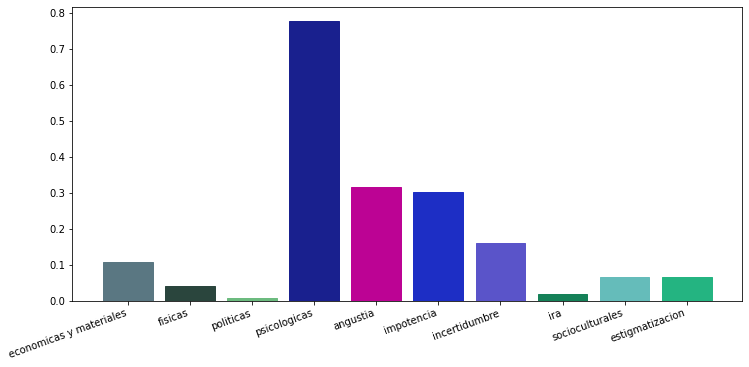

In [38]:
## TODAS las afectaciones
import matplotlib.pyplot as plt
import numpy

Percs1 = ResultadosTestM2_perc['15_TM_HAP (2).docx']    #Todas las afectaciones
#Percs1 = ResultadosTestM2Cat_perc['15_TM_HAP (2).docx']  #Solo categorías 

Values = [val for val in Percs1.values() if val>0.0]
Labels = [key for key in Percs1.keys() if Percs1[key]>0.0]

fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(Labels, Values)

randRGB = numpy.random.uniform(low=0, high=0.8,size=(len(Labels),3)) #RGB aleatorio, también se puede b/n aleatorio.
[bars[i].set_color(randRGB[i]) for i in range(len(bars))]
#print(randRGB)
fig.autofmt_xdate(rotation=20)

###### B) Diagrama de torta

[0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0]


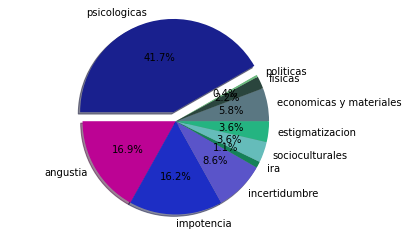

In [39]:
desfase = [0 if Values[i] != max(Percs1.values()) else 0.1 for i in range(len(Values)) ]
print(desfase)
plt.figsize=(12,6)
plt.pie(Values, labels=Labels,colors=randRGB,
        autopct='%1.1f%%',
        explode=desfase,
        shadow=True,
        startangle=0)
plt.axis("equal")
plt.show()

##### c) Diagrama de nodos

In [40]:
import pyvis
import networkx as nx
import numpy
g = pyvis.network.Network(notebook=True,bgcolor='#ffffff')
g.add_node(len(Values),label = 'Testimonio', x = 0,y = 0)

R = (1-numpy.array(Values))*200
Theta = numpy.array([(i+1)*2*numpy.pi/(len(Values)) for i in range(len(Values)) ])
X = R*numpy.cos(Theta)
Y = R*numpy.sin(Theta)

for i in range(0,len(Values)):
    g.add_node(i,values=Values[i],
               x=float(X[i]),y=float(Y[i]),
               physics=True,   #Cambiar de True a False para las posiciones cercanas o lejanas.
               label=Labels[i],
               size = Values[i]*100,
               color='rgb'+str(tuple(randRGB[i]*255))) #size = Values[i]*100
    g.add_edge(len(Values),i,title=str(Values[i])) #A esto también se le puede poner color como al de arriba
g.show('example.html')

#Cambiar la figura de nodo de Testimonio

[ 0.72214269  0.29657336 -0.30694305 -0.17917826 -0.68456376 -0.564683
 -0.25924244  0.30279518  0.75472055  0.93288591] [ 5.24667373e-01  9.12758938e-01  9.44673587e-01  1.30180626e-01
  8.38348816e-17 -4.10266216e-01 -7.97866205e-01 -9.31907727e-01
 -5.48336578e-01 -2.28491148e-16]


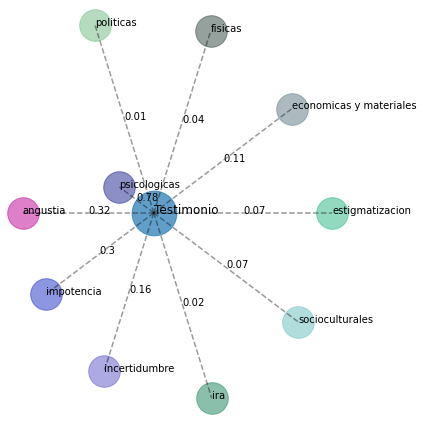

In [41]:
import numpy as np
import matplotlib.pyplot as plt

R = (1-numpy.array(Values))
Theta = numpy.array([(i+1)*2*numpy.pi/(len(Values)) for i in range(len(Values)) ]) #+0.2 #Se le puede girar un poquito o agruegar un numero aleatorio a cada una para que se vea mejor
X = R*numpy.cos(Theta)
Y = R*numpy.sin(Theta)
print(X,Y)
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(0,0,alpha=0.7,s=2000)
ax.text(0,0,'Testimonio', c = 'black',fontsize=12)
for i in range(len(Values)):
    ax.scatter(X[i], Y[i], alpha=0.5,color=randRGB[i],s=1000)
    ax.plot([0,X[i]],[0,Y[i]],color='black',ls='--',alpha=0.4)
    ax.text(X[i], Y[i],Labels[i])
    ax.text(X[i]/2, Y[i]/2,numpy.round(Values[i],2))
#ax.set_xlabel(r'$\Delta_i$', fontsize=15)
#ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
#ax.set_title('Hola XD')

ax.grid(False)
ax.axis('off')
fig.tight_layout()
plt.show()

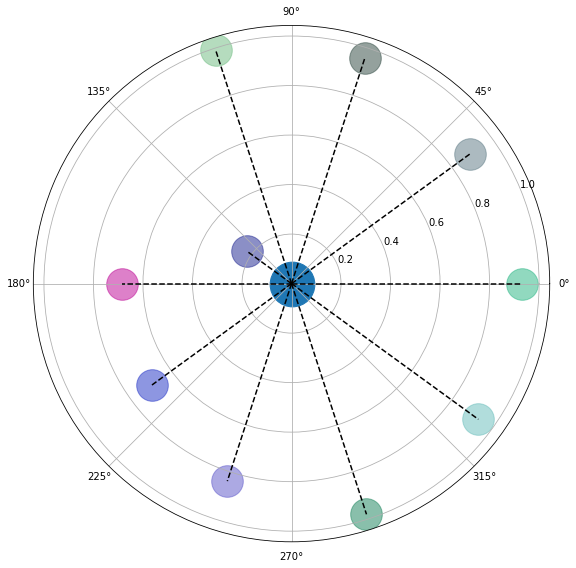

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.


R = (1-numpy.array(Values))
Theta = numpy.array([(i+1)*2*numpy.pi/(len(Values)) for i in range(len(Values)) ])
X = R*numpy.cos(Theta)
Y = R*numpy.sin(Theta)

fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': 'polar'})
ax.scatter(0,0,s=2000)
for i in range(len(Values)):
    ax.scatter(Theta[i],R[i], alpha=0.5,color=randRGB[i],s=1000)
    ax.plot([0,Theta[i]],[0,R[i]],color='black',ls='--')

ax.grid(True)
#ax.axis('off')
fig.tight_layout()

In [43]:
folder1 = FolderBase + "0. testimonios completos = 334/"
folder2 = FolderBase + "0. bitácoras completas = 57/"
ListaDirs = [folder1,folder2]

ResultadosTotalesM1,ResultadosTotalesM2 = DicsM1M2(ListaDirs,Afects,AfectsExpr,SW=True,ST=True)
print(len(ResultadosTotalesM2))

../testimonios completos/0. testimonios completos = 334/
../testimonios completos/0. bitácoras completas = 57/
391


In [44]:
def ConteosTotales(ResultadoM1,ResultadoM2):
    ConteoM1 = {k:0 for k in Afects.keys()}
    ConteoM2 = {}
    for k1,v1 in ResultadoM1.items():
        ConteoM1[v1] = ConteoM1.get(v1,0)+1

    for k1,v1 in ResultadoM2.items():
        for k2,v2 in v1.items():
            ConteoM2[k2] = ConteoM2.get(k2,0)+v2
    return ConteoM1,ConteoM2

def freqTotalDic(UseDict):
    Tot = sum(UseDict.values())
    if Tot != 0:
        ReturnDict = {k:v/Tot for k,v in UseDict.items()}
    else:
        ReturnDict = {k:0 for k,v in UseDict.items()}
    return ReturnDict

Conteo_TotalM1,Conteo_TotalM2 = ConteosTotales(ResultadosTotalesM1,ResultadosTotalesM2)
Conteo_TotalM1_Percs = freqTotalDic(Conteo_TotalM1)
Conteo_TotalM2_Percs = freqTotalDic(Conteo_TotalM2)

In [45]:
Conteo_TotalM1
{k: v for k, v in sorted(Conteo_TotalM1.items(), key=lambda item: -item[1])}

{'angustia': 238,
 'economicas y materiales': 64,
 'impotencia': 56,
 'incertidumbre': 18,
 'fisicas': 11,
 'socioculturales': 2,
 'miedo': 1,
 'estigmatizacion': 1,
 'politicas': 0,
 'psicologicas': 0,
 'culpa': 0,
 'ira': 0,
 'descredito': 0}

In [46]:
AfectsToCategories(Conteo_TotalM1)

{'economicas y materiales': 64,
 'fisicas': 11,
 'politicas': 0,
 'psicologicas': 0,
 'angustia': 238,
 'culpa': 0,
 'impotencia': 56,
 'incertidumbre': 18,
 'miedo': 1,
 'ira': 0,
 'socioculturales': 2,
 'estigmatizacion': 1,
 'descredito': 0}

In [47]:
Conteo_TotalM2
{k: v for k, v in sorted(Conteo_TotalM2.items(), key=lambda item: -item[1])}

{'psicologicas': 9471.0,
 'angustia': 4507,
 'impotencia': 3584,
 'economicas y materiales': 1371,
 'incertidumbre': 1139,
 'socioculturales': 488,
 'estigmatizacion': 358,
 'fisicas': 344,
 'miedo': 227,
 'politicas': 68,
 'descredito': 58,
 'ira': 50,
 'culpa': 14}

In [48]:
Conteo_TotalM2_Percs

{'economicas y materiales': 0.06324092439688178,
 'fisicas': 0.015867890585359104,
 'politicas': 0.0031366760459430785,
 'psicologicas': 0.43687439457539556,
 'angustia': 0.2078970432215508,
 'culpa': 0.0006457862447529867,
 'impotencia': 0.1653212786567646,
 'incertidumbre': 0.052539323769546564,
 'miedo': 0.01047096268278057,
 'ira': 0.0023063794455463814,
 'socioculturales': 0.02251026338853268,
 'estigmatizacion': 0.01651367683011209,
 'descredito': 0.002675400156833802}

In [92]:
def graficas(Nombre,PorcentajeM1,PorcentajeM2,Error,quitarbarra=None,):
    filt = Error
    Values1 = [x for x in PorcentajeM1.values() if x>filt]
    Labels1 = [(x[0].upper() + x[1:]) for x in PorcentajeM1.keys() if PorcentajeM1[x]>filt]

    Values2 = [x for x in PorcentajeM2.values() if x>filt]
    Labels2 = [(x[0].upper() + x[1:]) for x in PorcentajeM2.keys() if PorcentajeM2[x]>filt]

    for i in range(len(Labels1)):
        if Labels1[i] == 'Economicas y materiales':Labels1[i] = 'Económicas'

    for i in range(len(Labels2)):
        if Labels2[i] == 'Economicas y materiales': Labels2[i] = 'Económicas'
    
    for i in range(len(Labels2)):
        if Labels2[i] == quitarbarra:  ##Quitar psicologicas
            Labels2.pop(i);Values2.pop(i)
            break
    
    ErrorMean1 = [ErrorMean for i in Labels1]
    ErrorMean2 = [ErrorMean for i in Labels2]

    fig, ax = plt.subplots(1,2,figsize=(15,6))
    bars0 = ax[0].bar(Labels1,Values1,yerr=ErrorMean1,alpha=0.6,ecolor='black',capsize=6)
    bars1 = ax[1].bar(Labels2,Values2,yerr=ErrorMean2,alpha=0.6,ecolor='black',capsize=6)
    
    fig.suptitle(Nombre)
    #ax[0].set_title('Conteo de afectaciones por testimonio')
    #ax[1].set_title('Conteo porcentual de afectaciones por testimonio')
    ax[0].set_ylabel('Porcentaje (%)');ax[1].set_ylabel('Porcentaje (%)')
    
    print(Labels1)
    print(Labels2)
    ColorAfects = ['Económicas' if k =='economicas y materiales' else (k[0].upper()+k[1:]) for k in Afects]
    randRGB = {k:numpy.random.uniform(low=0, high=0.8,size=(3)) for k in ColorAfects}
    
    print(randRGB)
    [bars0[i].set_color(randRGB[Labels1[i]]) for i in range(len(Labels1))]
    [bars1[i].set_color(randRGB[Labels2[i]]) for i in range(len(Labels2))]

    fig.autofmt_xdate(rotation=20)
    fig.savefig('Resultados'+Nombre+'.png')

0.03784593553201837
['Económicas', 'Angustia', 'Impotencia', 'Incertidumbre']
['Económicas', 'Psicologicas', 'Angustia', 'Impotencia', 'Incertidumbre']
{'Económicas': array([0.15996995, 0.02187128, 0.18148569]), 'Fisicas': array([0.40213624, 0.30089665, 0.36082492]), 'Politicas': array([0.18153989, 0.3260665 , 0.13842338]), 'Psicologicas': array([0.05281399, 0.62823183, 0.69574041]), 'Angustia': array([0.46713688, 0.79037128, 0.28927917]), 'Culpa': array([0.68788248, 0.01007277, 0.7480485 ]), 'Impotencia': array([0.62284492, 0.06821623, 0.15395518]), 'Incertidumbre': array([0.66105856, 0.14521371, 0.4653667 ]), 'Miedo': array([0.27404747, 0.33659455, 0.36412647]), 'Ira': array([0.00111129, 0.32796216, 0.5611222 ]), 'Socioculturales': array([0.30212382, 0.19161168, 0.55751249]), 'Estigmatizacion': array([0.73299118, 0.63612364, 0.09852506]), 'Descredito': array([0.49405838, 0.5799603 , 0.08377605])}


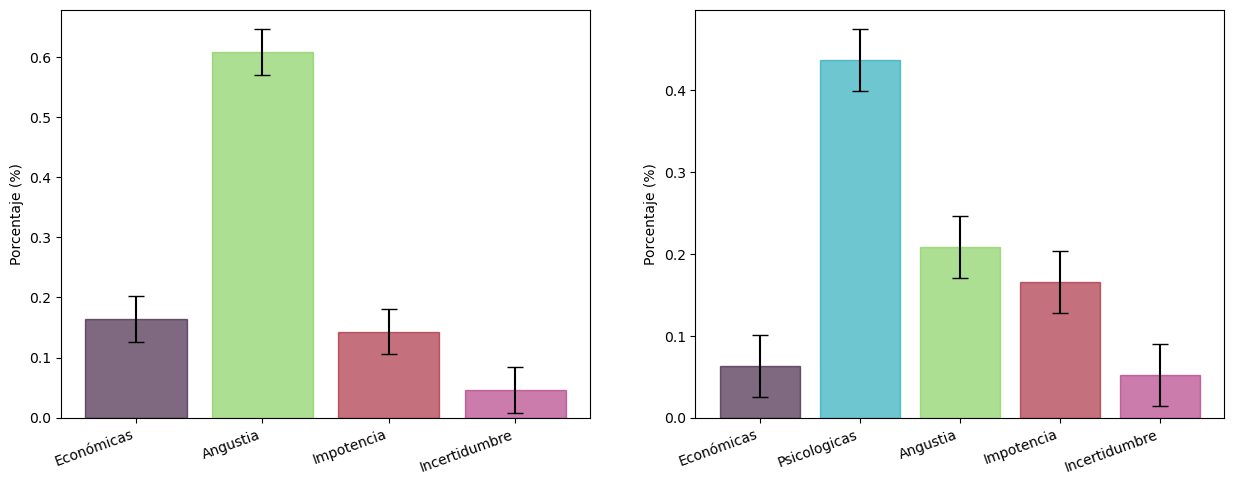

In [93]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
plt.rcdefaults()

TipoDeError = 'Sigma Y'
nonzero = 0
toterror = 0
for i in dfErrors1['Palabras y expresiones (TT)'][TipoDeError].values:
    if i != 0:
        nonzero+=1
        toterror = toterror+i
ErrorMean = toterror/nonzero
print(ErrorMean)
graficas('',Conteo_TotalM1_Percs,Conteo_TotalM2_Percs,ErrorMean,'PSICOLOGICAS')

### Lo mismo de atrás pero SOLO cateogrías

In [94]:
## Pasar a SOLO categorías: 
ResultadosTotalesM1Cat = AfectsToCategories(ResultadosTotalesM1)
ResultadosTotalesM2Cat = AfectsToCategories(ResultadosTotalesM2,'M2')

ConteoTotalM1Cat,ConteoTotalM2Cat = ConteosTotales(ResultadosTotalesM1Cat,ResultadosTotalesM2Cat)
ConteoTotalM1Cat_Percs = freqTotalDic(ConteoTotalM1Cat)
ConteoTotalM2Cat_Percs = freqTotalDic(ConteoTotalM2Cat)

In [95]:
ConteoTotalM1Cat

{'economicas y materiales': 64,
 'fisicas': 11,
 'politicas': 0,
 'psicologicas': 313,
 'angustia': 0,
 'culpa': 0,
 'impotencia': 0,
 'incertidumbre': 0,
 'miedo': 0,
 'ira': 0,
 'socioculturales': 3,
 'estigmatizacion': 0,
 'descredito': 0}

In [96]:
ConteoTotalM2Cat

{'economicas y materiales': 1371,
 'fisicas': 344,
 'politicas': 68,
 'psicologicas': 9471.0,
 'socioculturales': 488}

0.026883830455259033
['Económicas', 'Fisicas', 'Psicologicas']
['Económicas', 'Fisicas', 'Psicologicas', 'Socioculturales']
{'Económicas': array([0.65607113, 0.60145003, 0.64112209]), 'Fisicas': array([0.6632406 , 0.59353177, 0.50049454]), 'Politicas': array([0.26668511, 0.14139508, 0.76254573]), 'Psicologicas': array([0.41926015, 0.20208399, 0.01578646]), 'Angustia': array([0.1178031 , 0.75382856, 0.08296576]), 'Culpa': array([0.0416379 , 0.56030199, 0.05322322]), 'Impotencia': array([0.36654581, 0.74830903, 0.1533739 ]), 'Incertidumbre': array([0.11442515, 0.55904963, 0.23495207]), 'Miedo': array([0.58470756, 0.28611651, 0.08866079]), 'Ira': array([0.31922922, 0.28928774, 0.64725757]), 'Socioculturales': array([0.29621772, 0.17245902, 0.61905429]), 'Estigmatizacion': array([0.08685899, 0.65629106, 0.18943987]), 'Descredito': array([0.21768082, 0.0925622 , 0.16315036])}


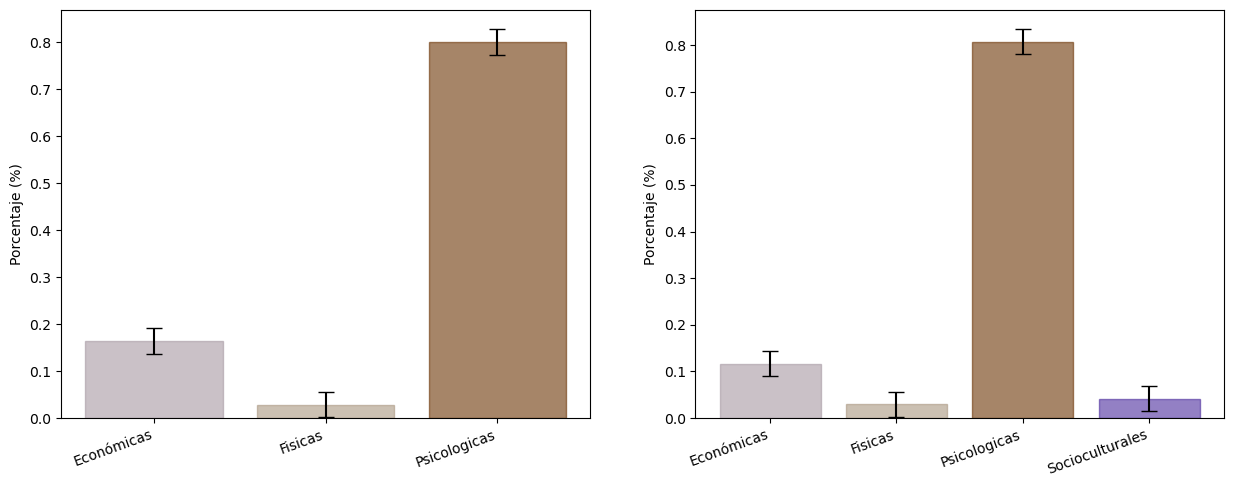

In [97]:
TipoDeError = 'Sigma Y'
nonzero = 0
toterror = 0
for i in dfErrorsCat[TipoDeError].values:
    if i != 0:
        nonzero+=1
        toterror = toterror+i
ErrorMean = toterror/nonzero
print(ErrorMean)

graficas('',ConteoTotalM1Cat_Percs,ConteoTotalM2Cat_Percs,ErrorMean)

### División de testimonios por clases

### For sobre todos los códigos de parentescos. (Solo categorías)

In [54]:
['ECONOMICAS' if k =='economicas y materiales' else k.upper() for k in Afects]

['ECONOMICAS',
 'FISICAS',
 'POLITICAS',
 'PSICOLOGICAS',
 'ANGUSTIA',
 'CULPA',
 'IMPOTENCIA',
 'INCERTIDUMBRE',
 'MIEDO',
 'IRA',
 'SOCIOCULTURALES',
 'ESTIGMATIZACION',
 'DESCREDITO']

0.026883830455259033


<ipython-input-48-9f875cd4f05c>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2,figsize=(15,6))


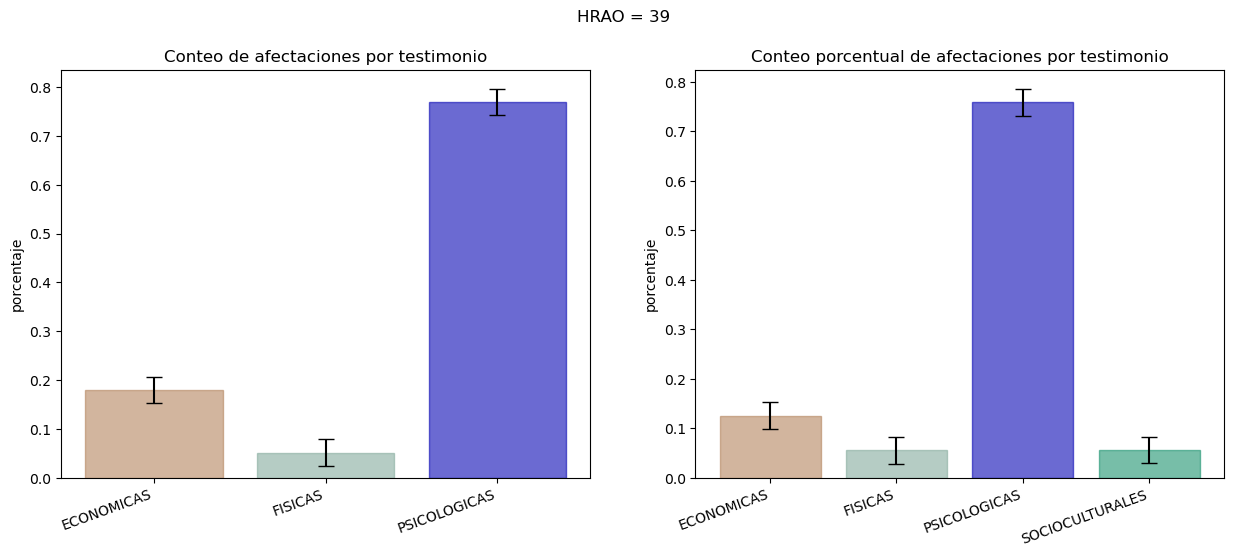

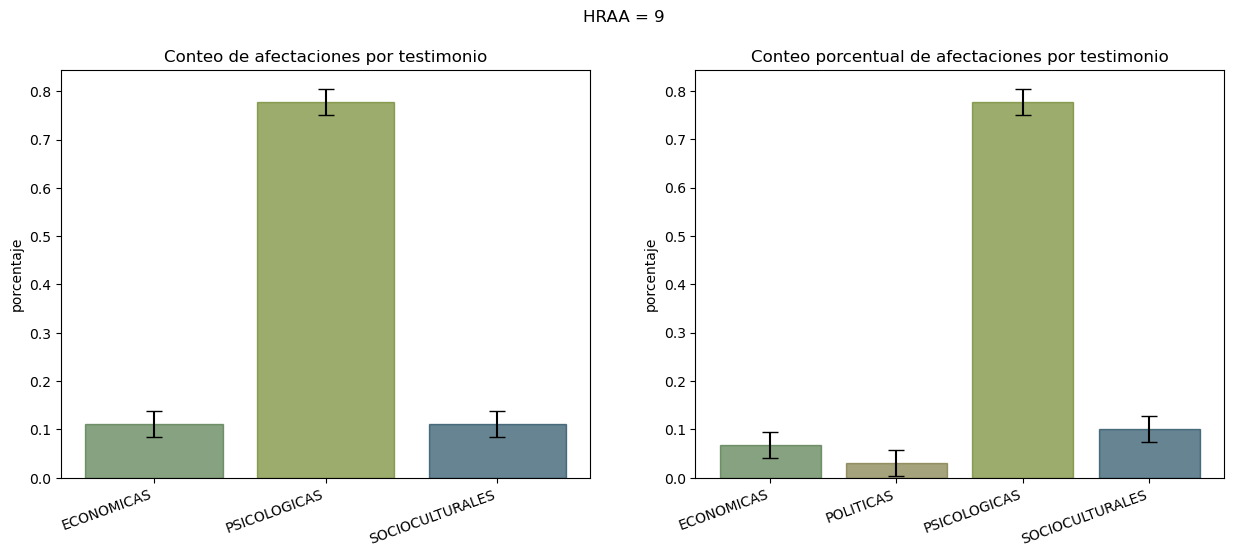

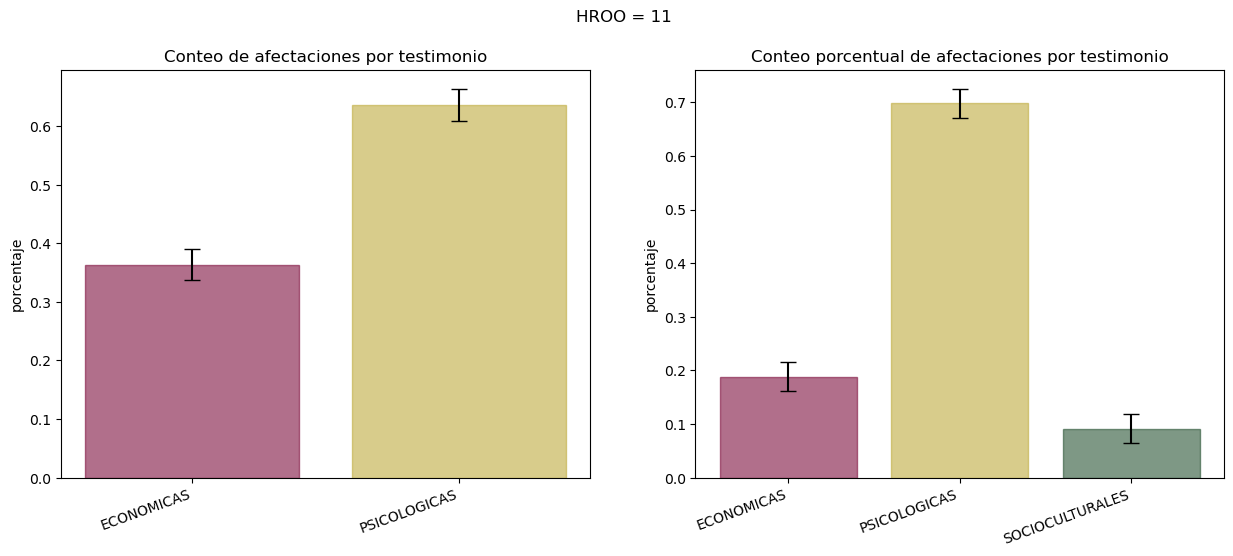

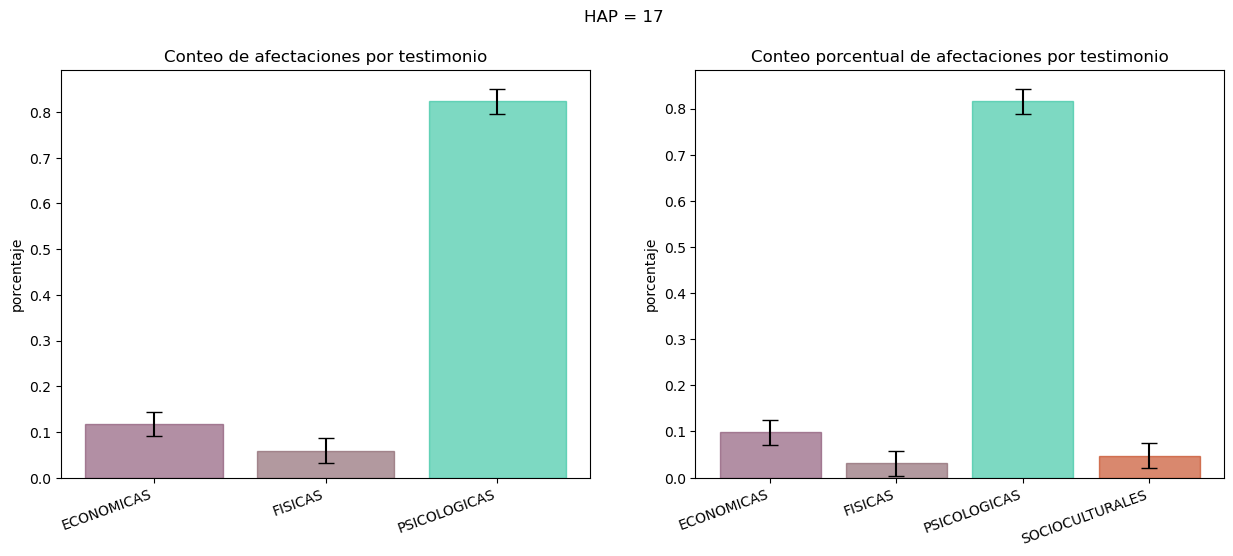

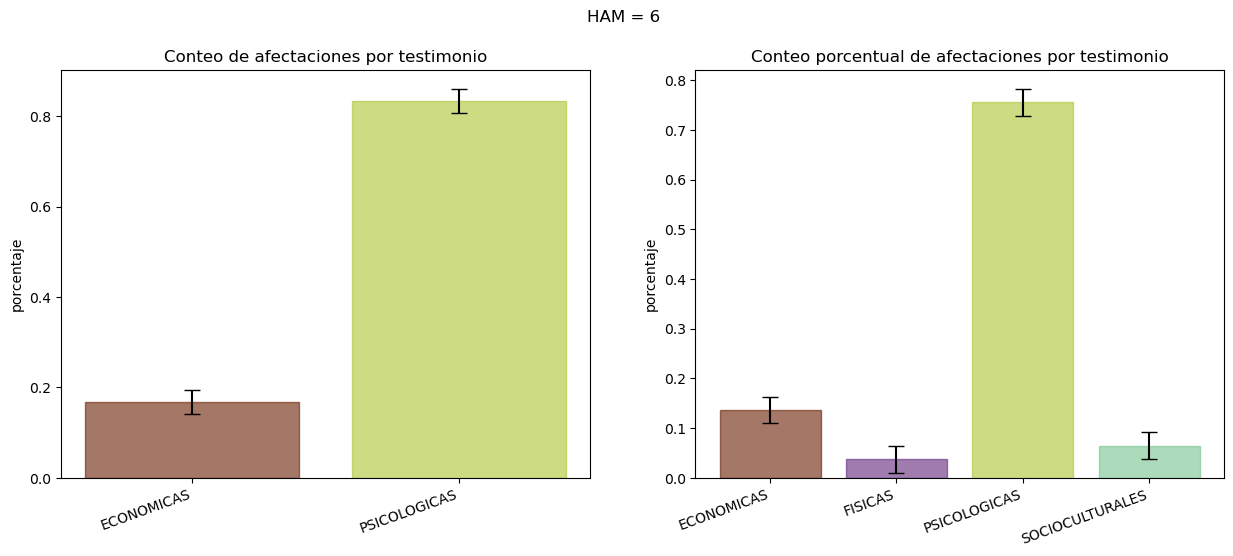

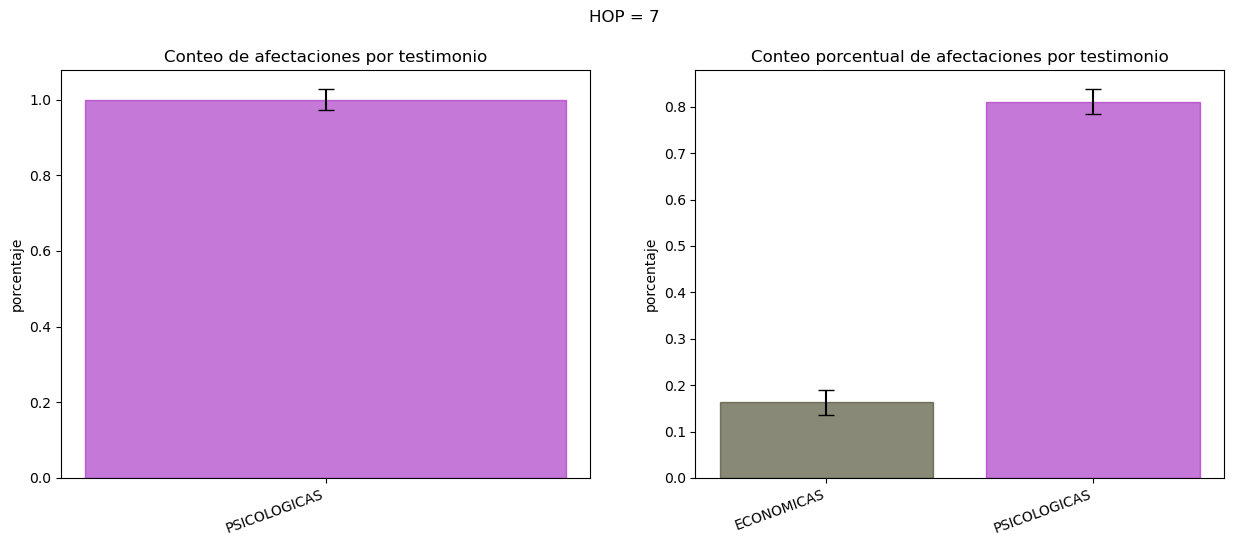

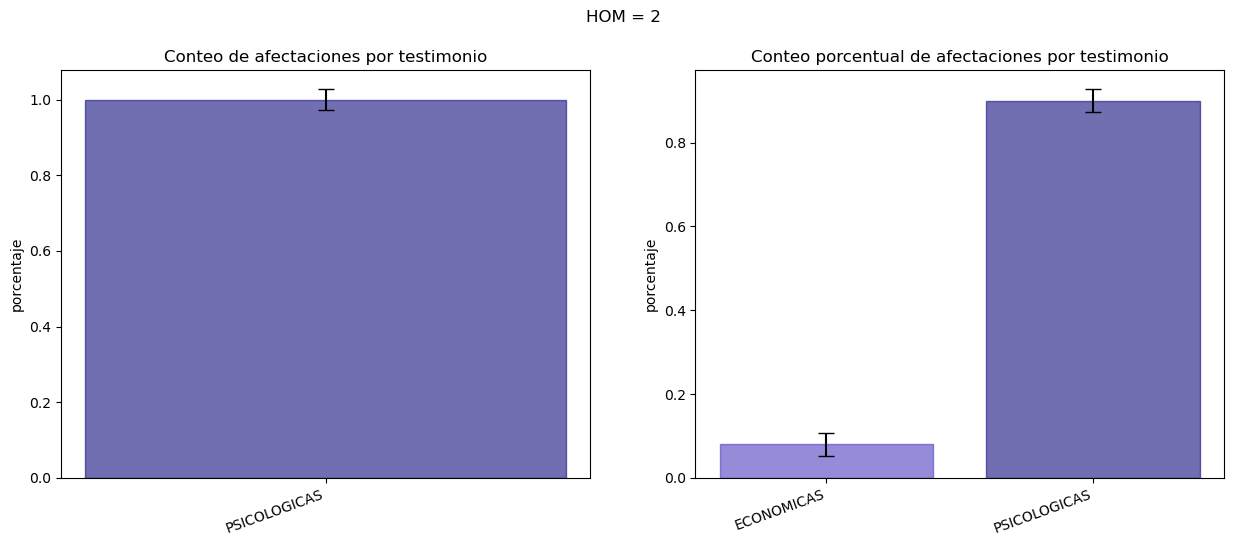

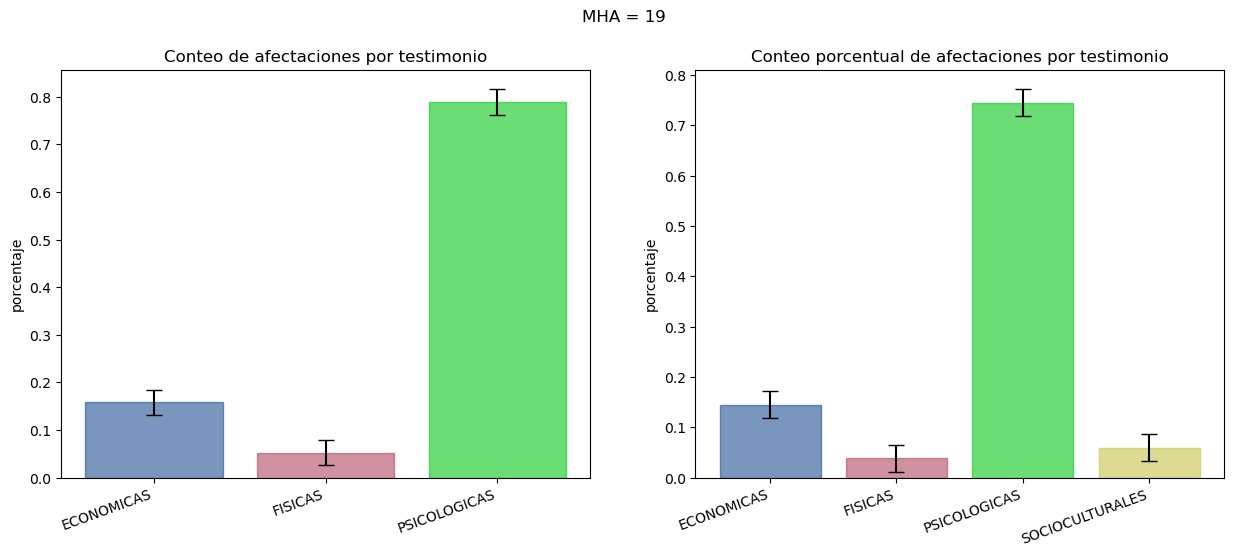

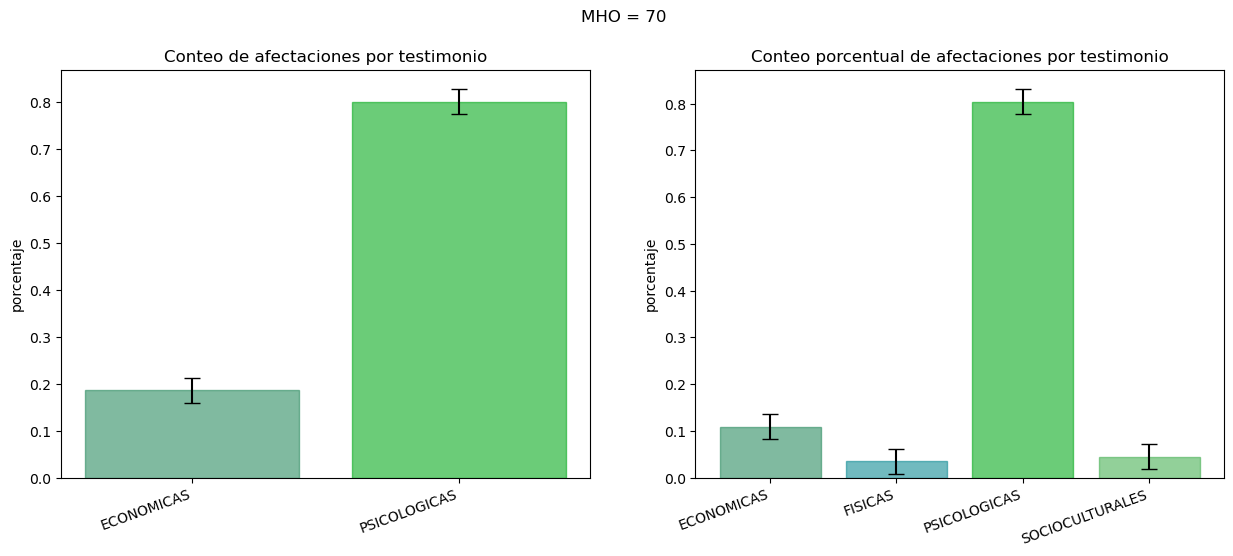

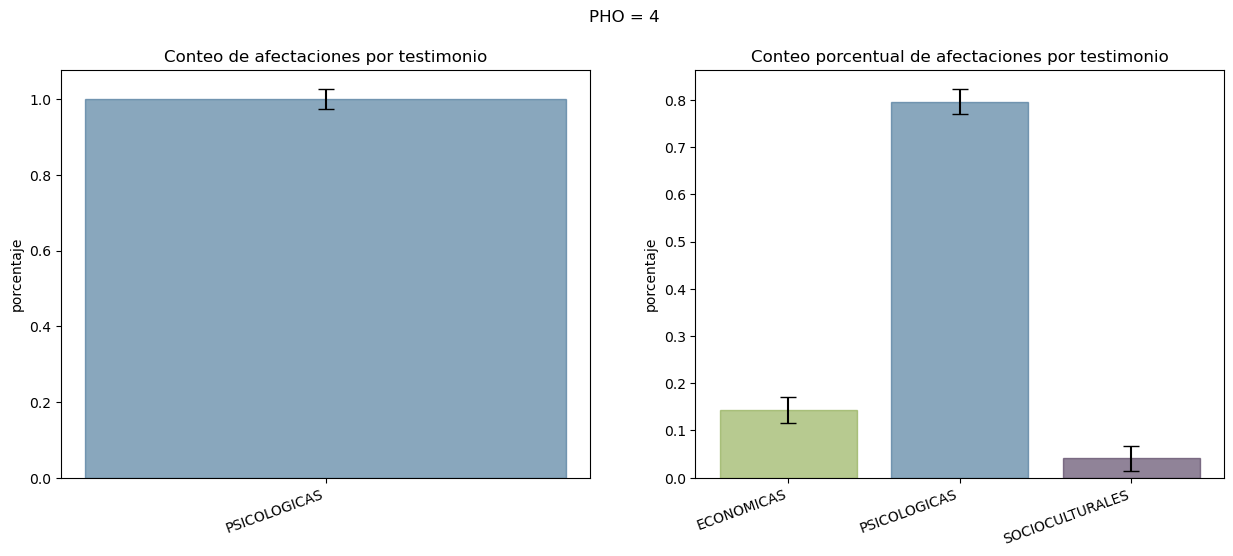

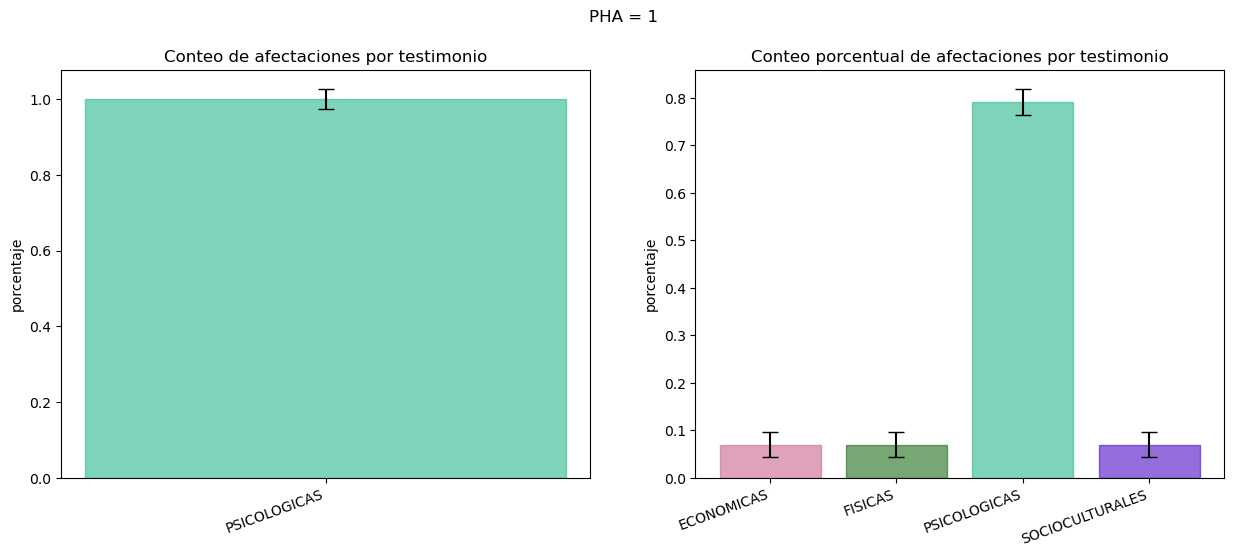

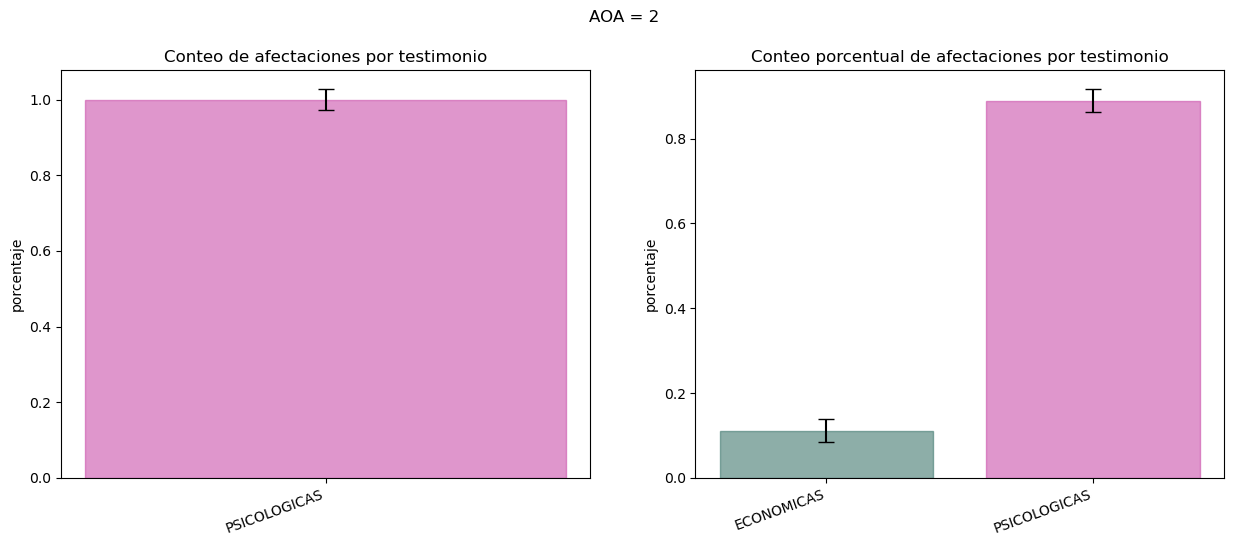

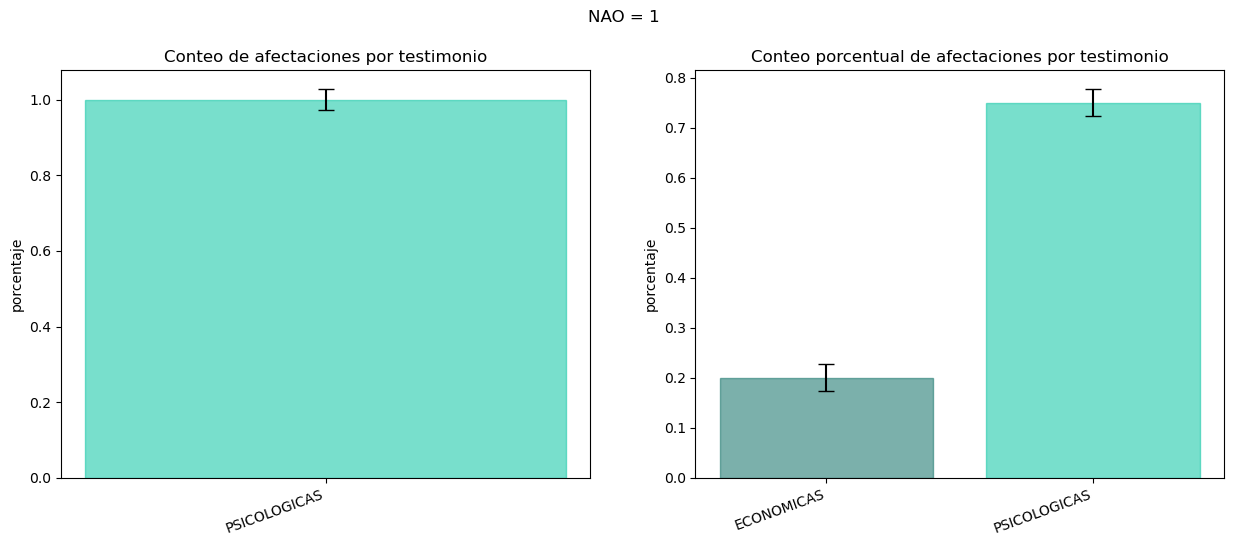

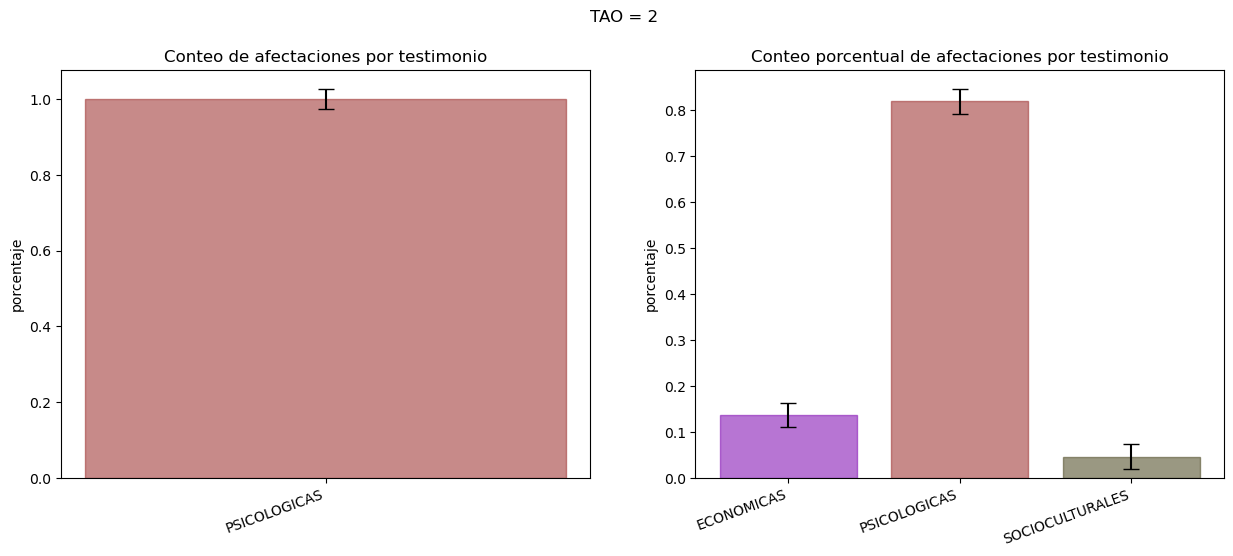

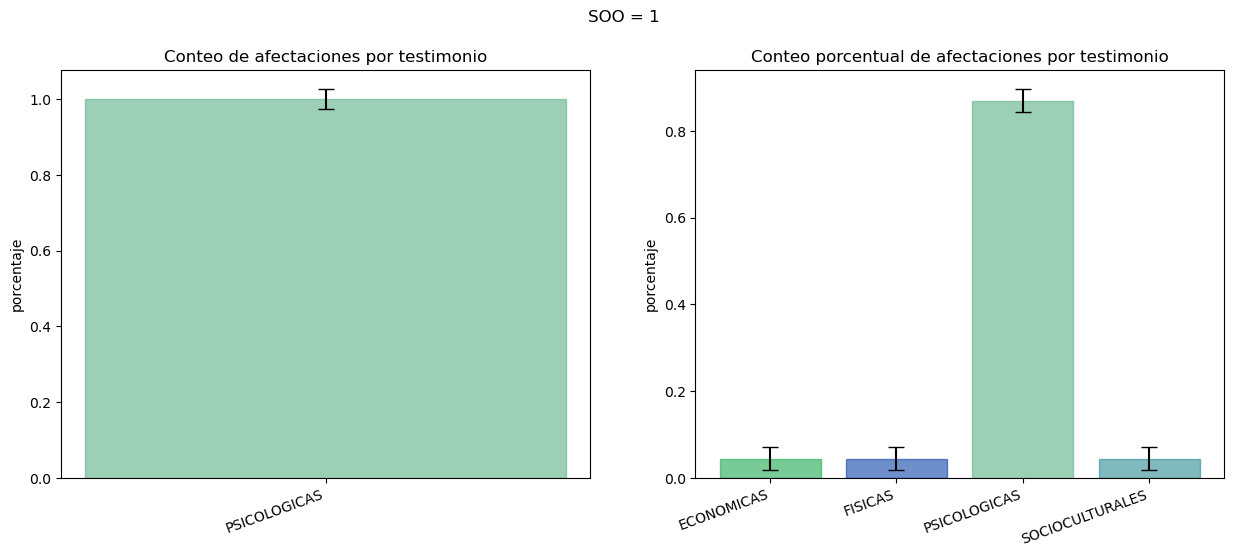

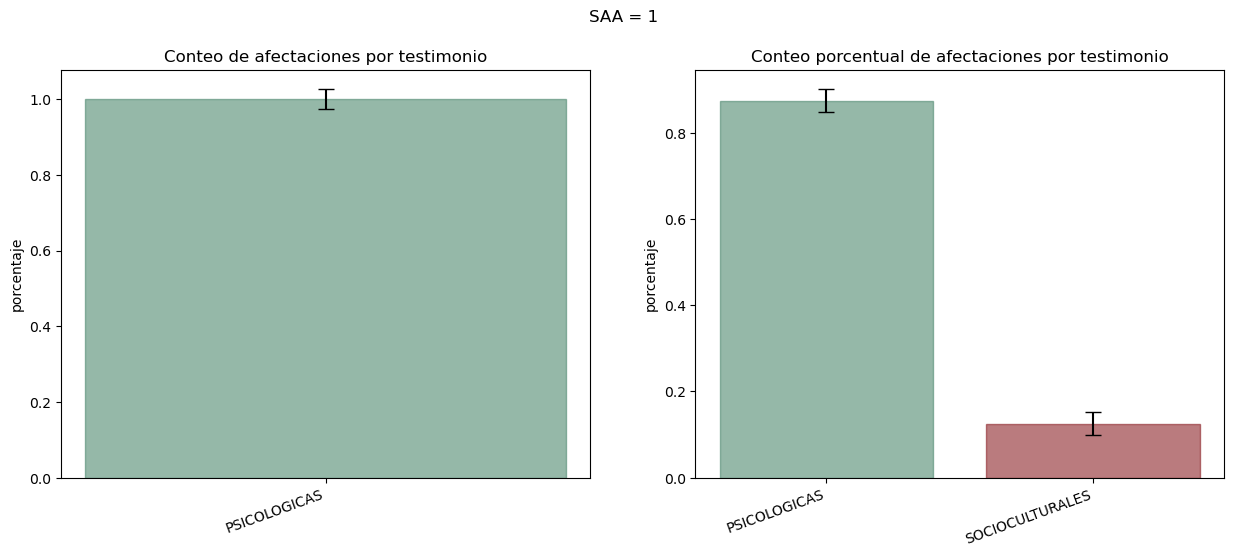

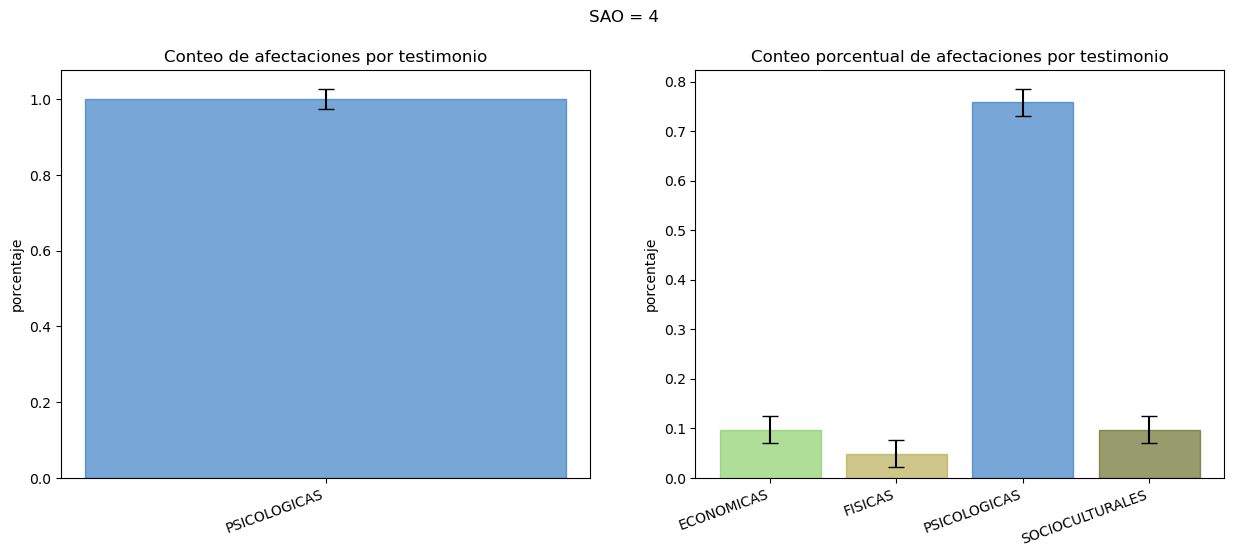

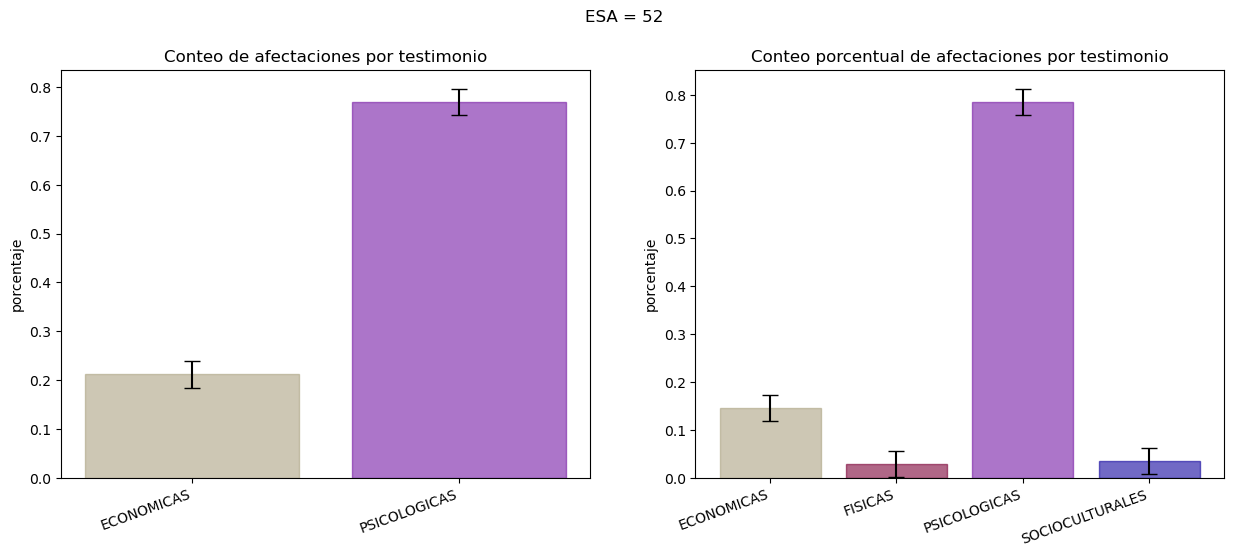

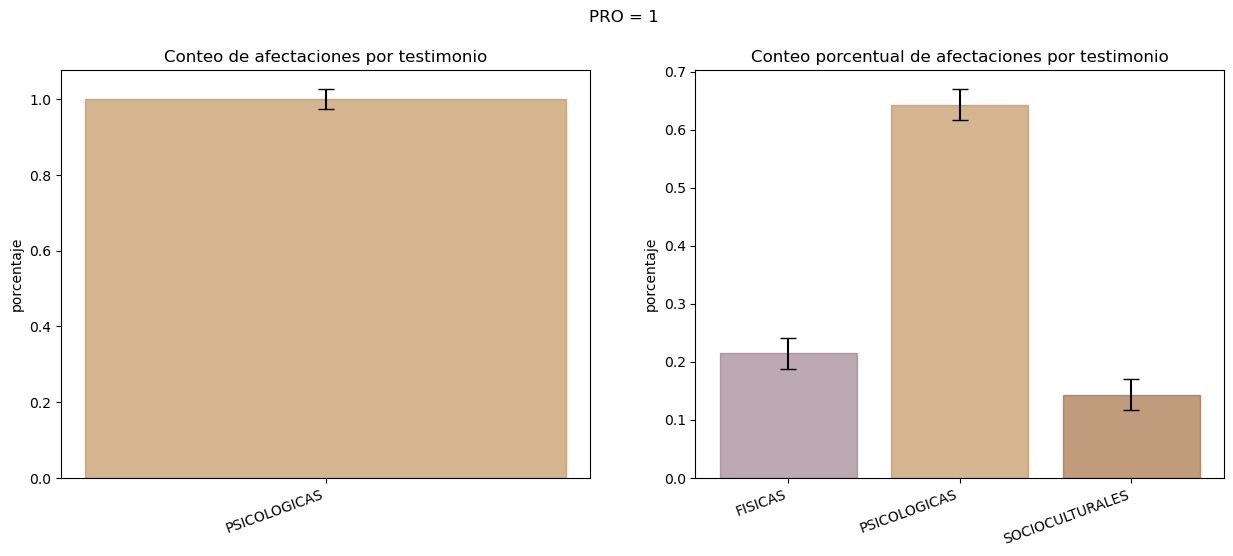

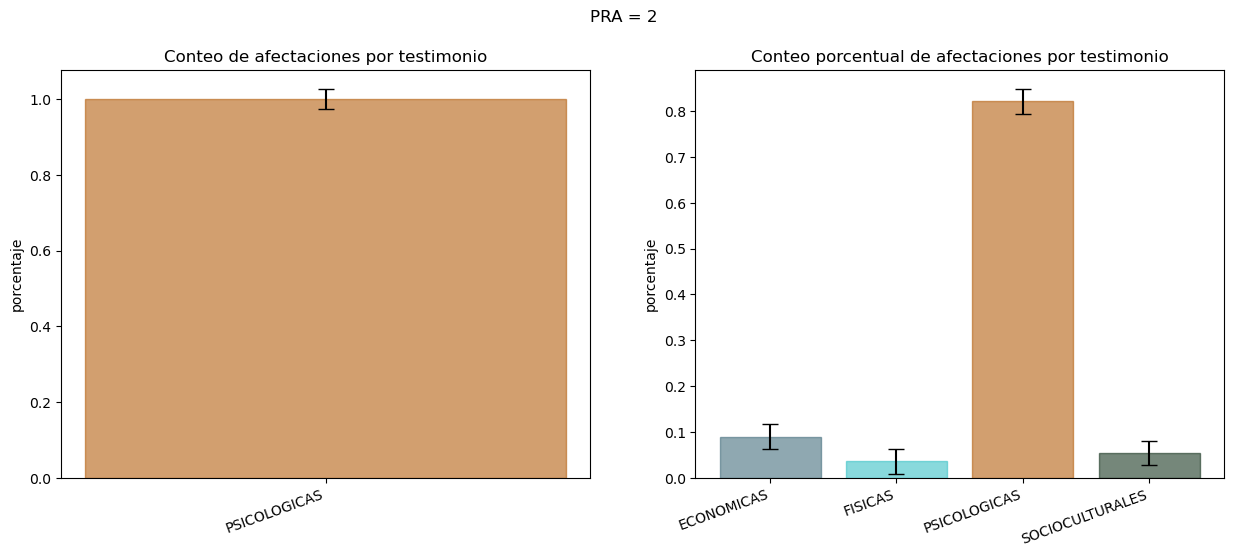

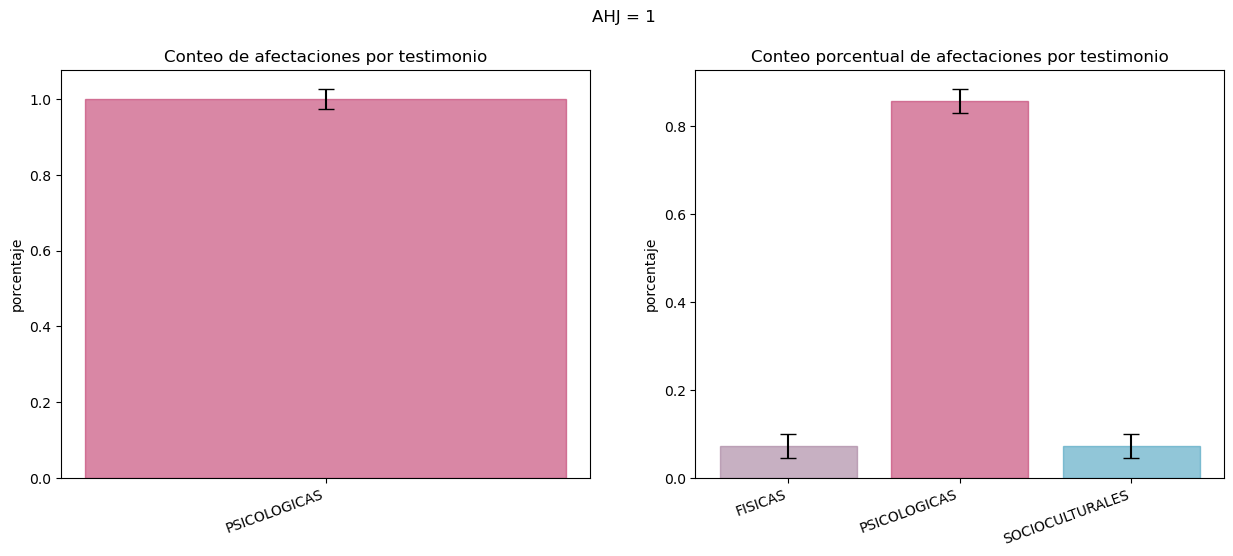

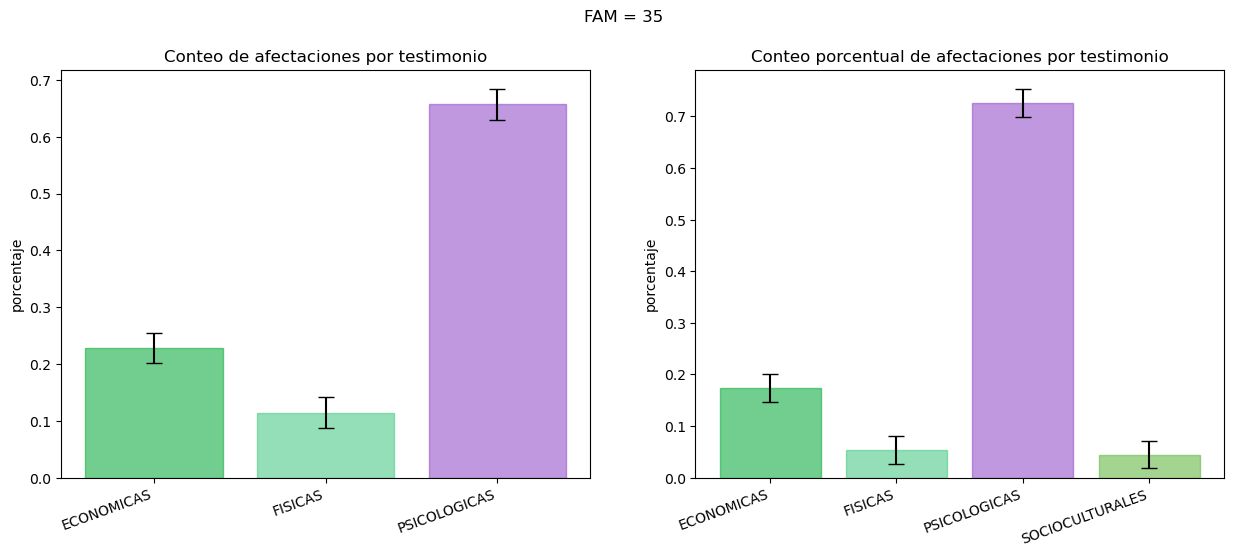

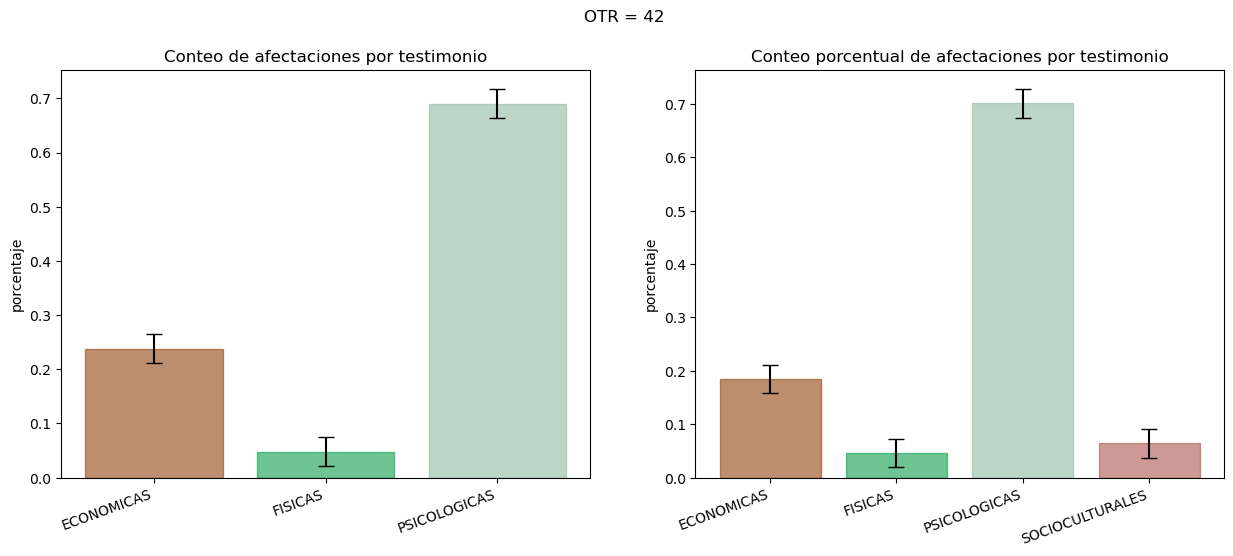

In [55]:
Codigos = ['HRAO','HRAA','HROO','HROA','HAP','HAM','HOP','HOM','MHA','MHO','PHO','PHA','AOA','NAO','TAA','TAO','TOA',
'TOO','SOA','SOO','SAA','SAO','ESA','PRO','PRA','AHJ','FAM','OTR']

TipoDeError = 'Sigma Y'
nonzero = 0
toterror = 0
for i in dfErrorsCat[TipoDeError].values:
    if i != 0:
        nonzero+=1
        toterror = toterror+i
ErrorMean = toterror/nonzero
print(ErrorMean)

ColorAfects = ['ECONOMICAS' if k =='economicas y materiales' else k.upper() for k in Afects]
randRGB = {k:numpy.random.uniform(low=0, high=0.8,size=(3)) for k in ColorAfects}

for cod in Codigos:
    current_catM1 = {}
    current_catM2 = {}
    for k1,v1 in ResultadosTotalesM1Cat.items():
        if cod in k1:
            current_catM1[k1] = v1
            current_catM2[k1] = ResultadosTotalesM2Cat[k1]
    if len(current_catM1)!=0 or len(current_catM2) != 0:
        CConteoTotalM1,CConteoTotalM2 = ConteosTotales(current_catM1,current_catM2)
        CConteoTotalM1_Percs = freqTotalDic(CConteoTotalM1)
        CConteoTotalM2_Percs = freqTotalDic(CConteoTotalM2)
        graficas(cod+' = '+str(len(current_catM1)),CConteoTotalM1_Percs,CConteoTotalM2_Percs,ErrorMean)